# 1. Import Necessary Libraries + Read Data

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from scipy.stats import ks_2samp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.calibration import calibration_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('../data/pitches', delimiter=',')

/var/folders/86/x0t_wy6j5dj_c3bk2_qhqhnc0000gn/T/ipykernel_17736/1939869262.py:1: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/pitches', delimiter=',')


# 2. Introductory EDA

In [3]:
print(data.head())

        uid  game_pk  year        date  team_id_b  team_id_p  inning  top  \
0  14143226   286874  2011  2011-03-31        108        118       1    1   
1  14143227   286874  2011  2011-03-31        108        118       1    1   
2  14143228   286874  2011  2011-03-31        108        118       1    1   
3  14143229   286874  2011  2011-03-31        108        118       1    1   
4  14143230   286874  2011  2011-03-31        108        118       1    1   

   at_bat_num  pcount_at_bat  ...  runner7_start  runner7_end  runner7_event  \
0           1              1  ...            NaN          NaN            NaN   
1           1              2  ...            NaN          NaN            NaN   
2           1              3  ...            NaN          NaN            NaN   
3           1              4  ...            NaN          NaN            NaN   
4           2              1  ...            NaN          NaN            NaN   

   runner7_score  runner7_rbi  runner7_earned           

In [4]:
data.describe()

,uid,game_pk,year,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,...,runner6_rbi,runner6_earned,runner7_id,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,modified_by
count,7.189610e+05,718961.000000,718961.0,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,718961.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,718961.0
mean,1.701980e+07,288557.611823,2011.0,128.787182,128.757296,5.033796,0.508900,39.301513,2.865276,37.357196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,1.665143e+06,3642.210956,0.0,14.281039,14.306711,2.692326,0.499921,23.320725,1.715068,30.690569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,1.414323e+07,286874.000000,2011.0,108.000000,108.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,1.557356e+07,287507.000000,2011.0,115.000000,115.000000,3.000000,0.000000,19.000000,1.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,1.703106e+07,288129.000000,2011.0,134.000000,134.000000,5.000000,1.000000,39.000000,3.000000,28.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,1.845894e+07,288749.000000,2011.0,141.000000,141.000000,7.000000,1.000000,58.000000,4.000000,61.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
max,1.983820e+07,317073.000000,2011.0,158.000000,158.000000,19.000000,1.000000,158.000000,16.000000,133.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


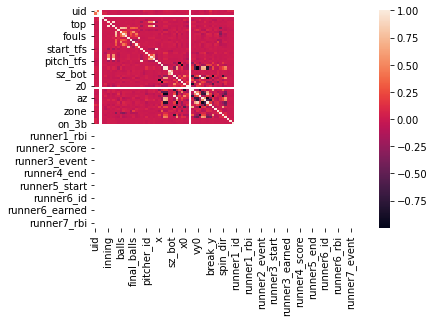

In [5]:
sns.heatmap(data.corr())
plt.show()

In [6]:
pitch_counts = data['pitch_type'].value_counts()
print(pitch_counts)

FF    238541
SL    109756
SI     87740
FT     81056
CH     72641
CU     56379
FC     41702
FS     10503
KC      8490
KN      4450
IN      4058
PO       559
FO       329
FA       204
EP       134
SC       120
UN        17
AB         2
Name: pitch_type, dtype: int64


## DISTRIBUTION OF PITCH SPEED VS. PITCH TYPE

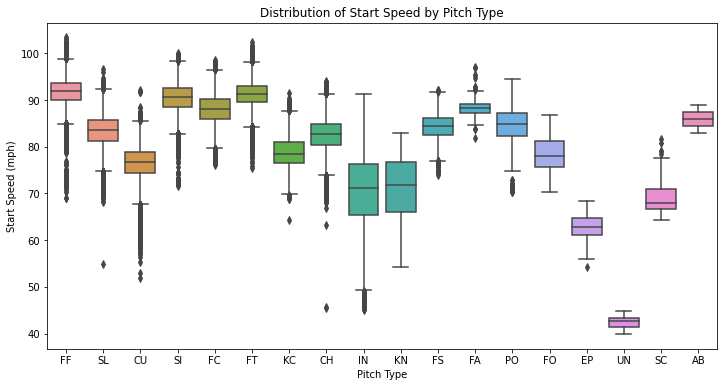

In [7]:
# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='pitch_type', y='start_speed', data=data)

# Add titles and labels
plt.title("Distribution of Start Speed by Pitch Type")
plt.xlabel("Pitch Type")
plt.ylabel("Start Speed (mph)")
plt.show()

### Findings: UN pitch type are likely from position players (after a team has exhausted bullpen) or a result of an error

# 3. Examine Dataset for Errors + Make Corrections

In [8]:
for column in data.columns:
    print(column, data[column].isnull().sum())

uid 0
game_pk 0
year 0
date 0
team_id_b 0
team_id_p 0
inning 0
top 0
at_bat_num 0
pcount_at_bat 0
pcount_pitcher 0
balls 0
strikes 0
fouls 0
outs 0
is_final_pitch 0
final_balls 0
final_strikes 0
final_outs 0
start_tfs 0
start_tfs_zulu 0
batter_id 0
stand 0
b_height 0
pitcher_id 0
p_throws 0
at_bat_des 0
event 0
event2 710662
event3 718627
event4 718938
away_team_runs 0
home_team_runs 0
score 662865
pitch_des 0
pitch_id 0
type 0
pitch_tfs 302
pitch_tfs_zulu 302
x 0
y 0
sv_id 2280
start_speed 2280
end_speed 2280
sz_top 2280
sz_bot 2280
pfx_x 2280
pfx_z 2280
px 2280
pz 2280
x0 2280
z0 2280
y0 2280
vx0 2280
vz0 2280
vy0 2280
ax 2280
az 2280
ay 2280
break_length 2280
break_y 2280
break_angle 2280
pitch_type 2280
type_confidence 2280
zone 2280
nasty 2280
spin_dir 2280
spin_rate 2280
cc 691024
on_1b 502638
on_2b 579258
on_3b 647326
runner1_id 718961
runner1_start 718961
runner1_end 718961
runner1_event 718961
runner1_score 718961
runner1_rbi 718961
runner1_earned 718961
runner2_id 718961
runn

data collected from after each pitch cannot be used to predict that pitch (but can be used to predict future pitches)

## a. Check for invalid balls, strikes, outs, inning number

In [9]:
print(data[data['balls'] > 3]['balls'])
print(data[data['strikes'] > 2]['strikes'])
print(data[data['outs'] > 2]['outs'])
print(data[data['inning'] <= 0]['inning'])

334853    4
334854    4
612709    4
Name: balls, dtype: int64
Series([], Name: strikes, dtype: int64)
Series([], Name: outs, dtype: int64)
Series([], Name: inning, dtype: int64)


### i. Deciding to convert cases of 4 balls to 3 balls. I examined dataset, and it seems like an extra ball may have been given. For our purpose, 3-2 and 4-2 would put batter and pitcher in similar position (a ball or strike would end the at-bat), which supports my decision to convert 4 balls to 3 balls.

In [10]:
data.loc[data['balls'] == 4, 'balls'] = 3

## b. Examine distribution of pitch type confidence, remove pitches below confidence threshold


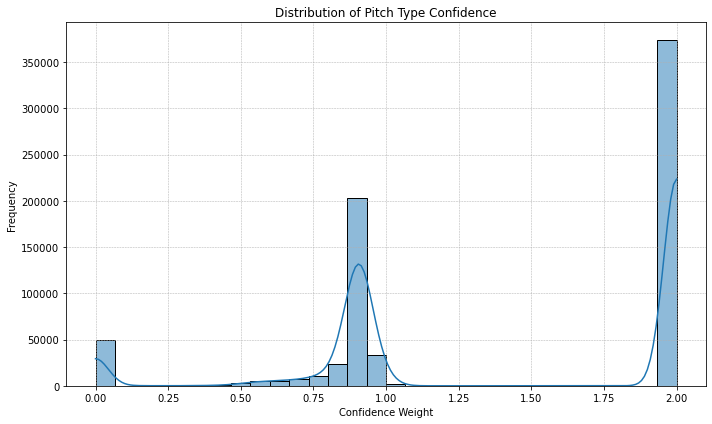

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(data['type_confidence'], kde=True, bins=30)
plt.title('Distribution of Pitch Type Confidence')
plt.xlabel('Confidence Weight')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Findings: There are peaks near 0, .875, and 2 pitch type confidence. I must determine how to remove the low confidence pitches.

### i. Plot distribution of type confidence by pitch type to see which pitch types are producing least confidence.

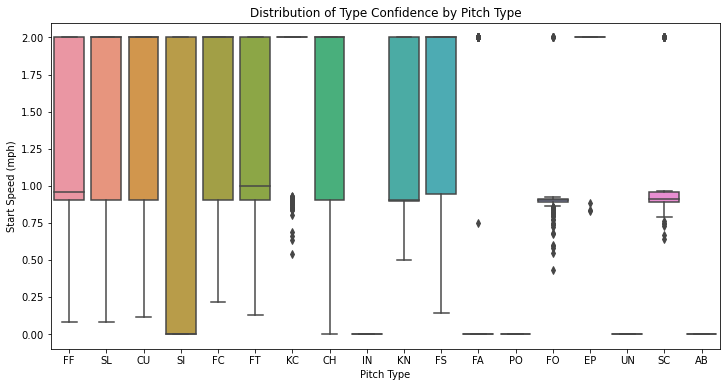

In [12]:
# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='pitch_type', y='type_confidence', data=data)

# Add titles and labels
plt.title("Distribution of Type Confidence by Pitch Type")
plt.xlabel("Pitch Type")
plt.ylabel("Start Speed (mph)")
plt.show()

In [13]:
# Define the bins
bins = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0001]

# Create a new column 'bins' using pd.cut()
data['bins'] = pd.cut(data['type_confidence'], bins, right=False)

# Group by the 'bins' and 'pitch_type' columns and count the occurrences
data.groupby(['bins', 'pitch_type']).size().unstack(fill_value=0)

pitch_type,AB,CH,CU,EP,FA,FC,FF,FO,FS,FT,IN,KC,KN,PO,SC,SI,SL,UN
bins,,,,,,,,,,,,,,,,,,
"[0.0, 0.25)",2,226,1,0,169,1,22,0,3,9,4058,0,0,559,0,44259,50,17
"[0.25, 0.5)",0,288,21,0,0,145,749,1,40,272,0,0,0,0,0,1,199,0
"[0.5, 0.75)",0,1844,525,0,0,1938,9808,10,359,4422,0,4,22,0,5,13,2450,0
"[0.75, 1.0)",0,26159,22944,3,1,16000,115578,310,2696,36192,0,50,2271,0,93,222,45516,0
"[1.0, 1.25)",0,0,1,0,0,49,692,0,0,1045,0,0,0,0,0,0,78,0
"[1.25, 1.5)",0,0,6,0,0,0,7,0,0,0,0,0,0,0,0,0,3,0
"[1.5, 1.75)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"[1.75, 2.0)",0,44124,32881,131,34,23569,111685,8,7405,39116,0,8436,2157,0,22,43245,61460,0


### Findings: The pitch types IN, PO, SI, FA, UN, and AB contain several low confidence pitches.

In [14]:
# Group by the 'bins' and 'pitch_type' columns and count the occurrences
pitch_counts = data.groupby(['bins', 'pitch_type']).size().unstack(fill_value=0)

# Normalize the counts in each bin to get the percentage
pitch_percentages = pitch_counts.divide(pitch_counts.sum(axis=1), axis=0) * 100

pitch_percentages.round(1).fillna(0)

pitch_type,AB,CH,CU,EP,FA,FC,FF,FO,FS,FT,IN,KC,KN,PO,SC,SI,SL,UN
bins,,,,,,,,,,,,,,,,,,
"[0.0, 0.25)",0.0,0.5,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.0,1.1,0.0,89.6,0.1,0.0
"[0.25, 0.5)",0.0,16.8,1.2,0.0,0.0,8.4,43.6,0.1,2.3,15.9,0.0,0.0,0.0,0.0,0.0,0.1,11.6,0.0
"[0.5, 0.75)",0.0,8.6,2.5,0.0,0.0,9.1,45.8,0.0,1.7,20.7,0.0,0.0,0.1,0.0,0.0,0.1,11.4,0.0
"[0.75, 1.0)",0.0,9.8,8.6,0.0,0.0,6.0,43.1,0.1,1.0,13.5,0.0,0.0,0.8,0.0,0.0,0.1,17.0,0.0
"[1.0, 1.25)",0.0,0.0,0.1,0.0,0.0,2.6,37.1,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,0.0
"[1.25, 1.5)",0.0,0.0,37.5,0.0,0.0,0.0,43.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.8,0.0
"[1.5, 1.75)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"[1.75, 2.0)",0.0,11.8,8.8,0.0,0.0,6.3,29.8,0.0,2.0,10.5,0.0,2.3,0.6,0.0,0.0,11.6,16.4,0.0


### ii. Set cutoff for pitch type confidence to .5, and remove all pitches where type confidence was less than .5

In [15]:
data = data[data['type_confidence'] >= .5].reset_index(drop=True)

In [16]:
## RERUNNING EARLIER CODE

# Define the bins
bins = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0001]

# Create a new column 'bins' using pd.cut()
data['bins'] = pd.cut(data['type_confidence'], bins, right=False)

# Group by the 'bins' and 'pitch_type' columns and count the occurrences
data.groupby(['bins', 'pitch_type']).size().unstack(fill_value=0)

pitch_type,CH,CU,EP,FA,FC,FF,FO,FS,FT,KC,KN,SC,SI,SL
bins,,,,,,,,,,,,,,
"[0.0, 0.25)",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"[0.25, 0.5)",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"[0.5, 0.75)",1844,525,0,0,1938,9808,10,359,4422,4,22,5,13,2450
"[0.75, 1.0)",26159,22944,3,1,16000,115578,310,2696,36192,50,2271,93,222,45516
"[1.0, 1.25)",0,1,0,0,49,692,0,0,1045,0,0,0,0,78
"[1.25, 1.5)",0,6,0,0,0,7,0,0,0,0,0,0,0,3
"[1.5, 1.75)",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"[1.75, 2.0)",44124,32881,131,34,23569,111685,8,7405,39116,8436,2157,22,43245,61460


#### I. By removing pitches below .5 type confidence, we effectively removed the pitches with type:
- AB
- IN
- PO
- SN

## c. Remove remaining pitches with too little frequency


In [17]:
pitch_counts = data['pitch_type'].value_counts()
print(pitch_counts)

FF    237770
SL    109507
FT     80775
CH     72127
CU     56357
SI     43480
FC     41556
FS     10460
KC      8490
KN      4450
FO       328
EP       134
SC       120
FA        35
Name: pitch_type, dtype: int64


### i. Of the remaining pitches in the dataset, the pitch types EP and FA occur with such little frequency (too few to be useful for prediction), so I will remove those as well

In [18]:
data = data[data['pitch_type'].isin(["EP", "FA"]) == False].reset_index(drop=True)

should remove pitch types UN and AB because of low confidence + fact that they are unknown types. Should remove PO, IN, because low confidence. Will set confidence threshold at .5.

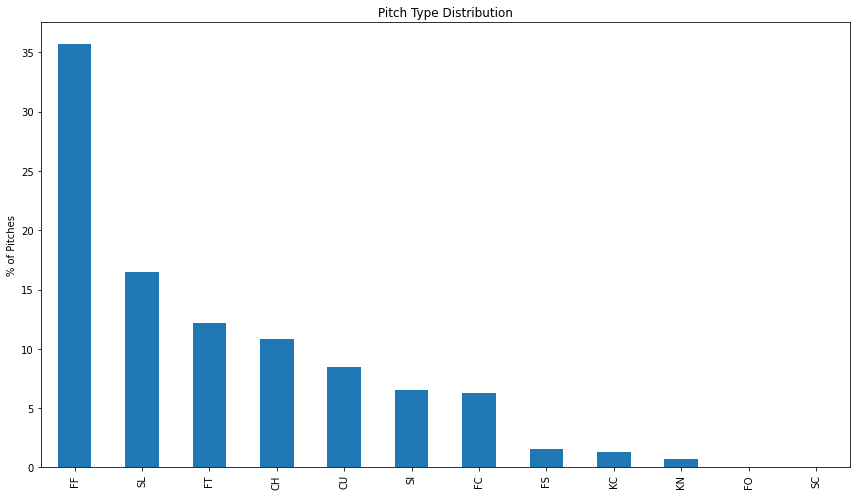

In [19]:
pitch_counts = data['pitch_type'].value_counts()
pitch_percentages = (pitch_counts / pitch_counts.sum()) * 100
pitch_percentages.plot(kind='bar', figsize=(12,7))
plt.title('Pitch Type Distribution')
plt.ylabel('% of Pitches')
plt.tight_layout()
plt.show()

# 4. Analyze Pitch Count

In [20]:
# Create a column for pitch count
data['pitch_count'] = data['balls'].astype(str) + "-" + data['strikes'].astype(str)

## a. Plot frequencies of pitch type for each count (stacked and separately)

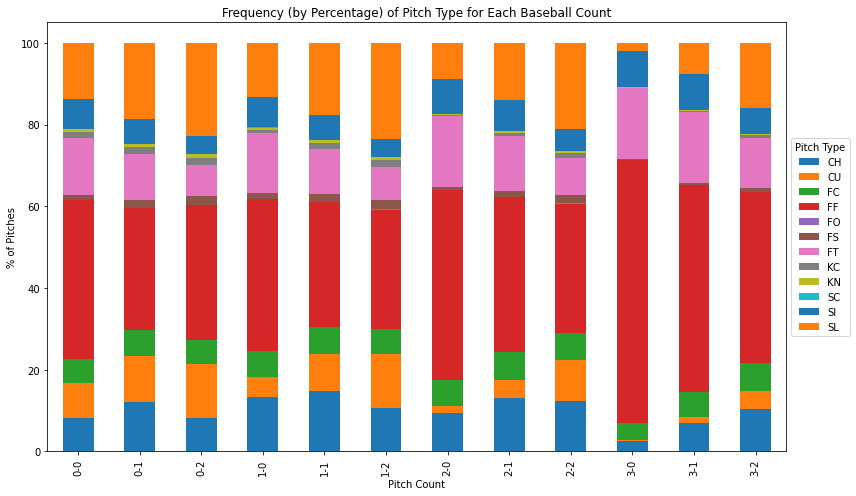

In [21]:
grouped = data.groupby(['pitch_count', 'pitch_type']).size().reset_index(name='counts')
total_pitches = grouped.groupby('pitch_count')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='pitch_count', columns='pitch_type', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type for Each Baseball Count')
plt.ylabel('% of Pitches')
plt.xlabel('Pitch Count')
plt.legend(title='Pitch Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

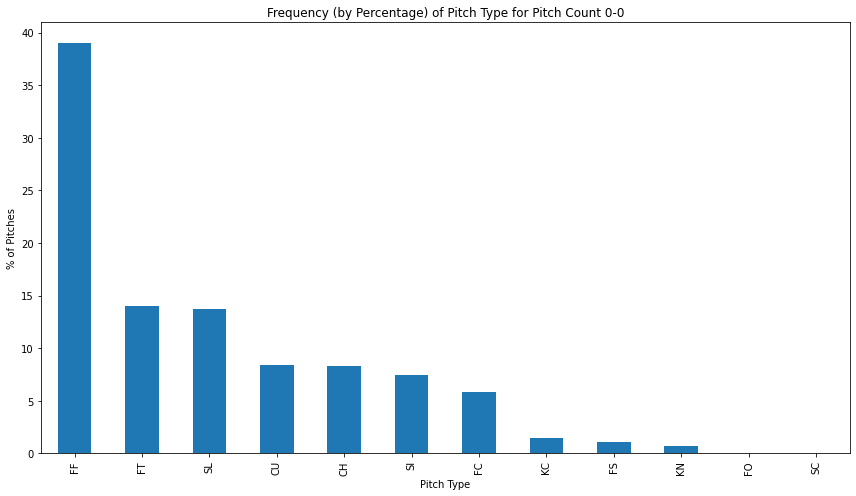

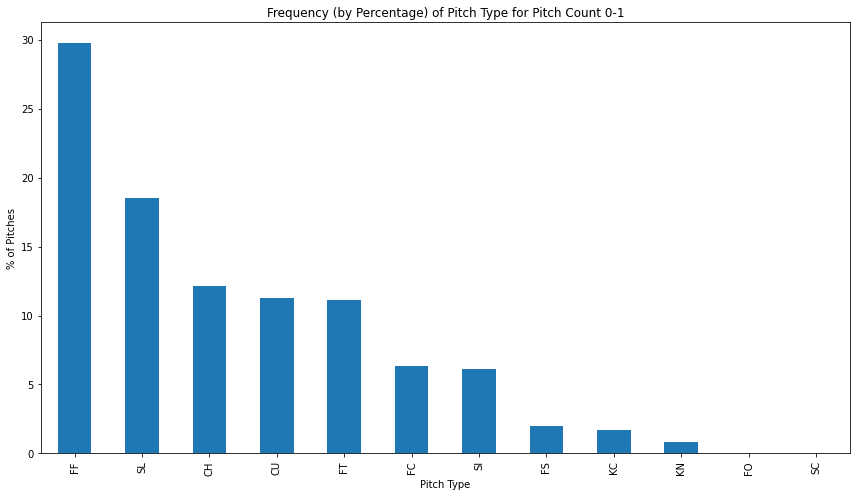

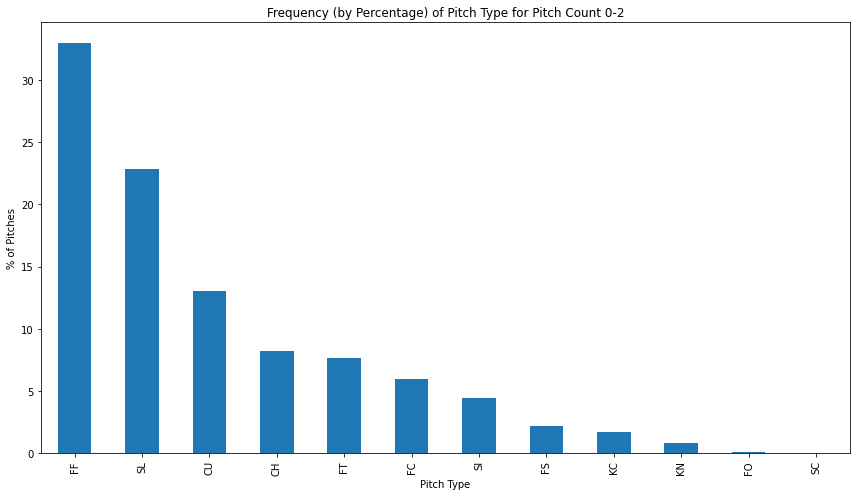

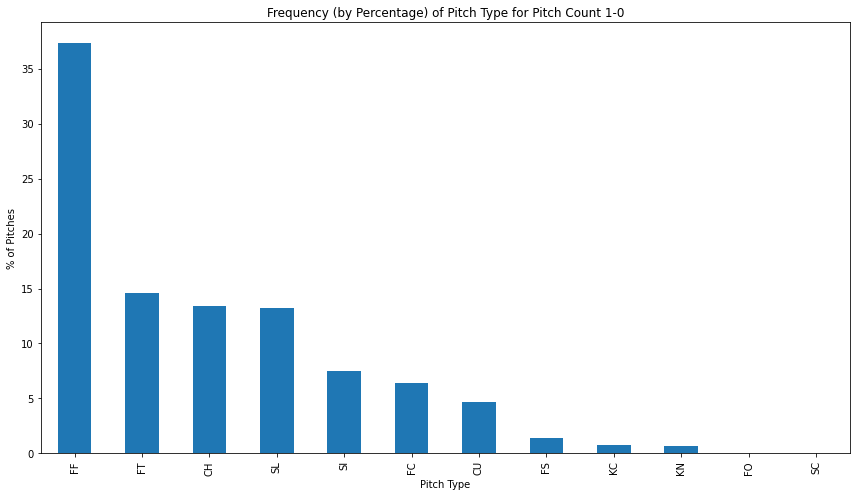

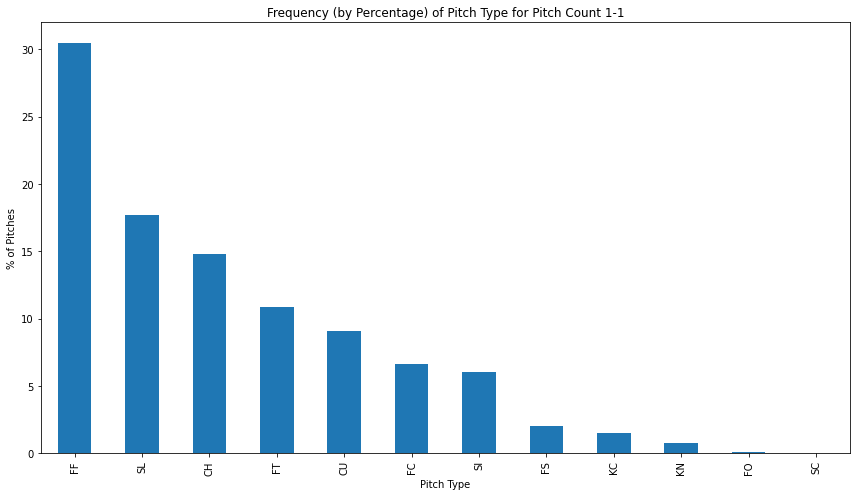

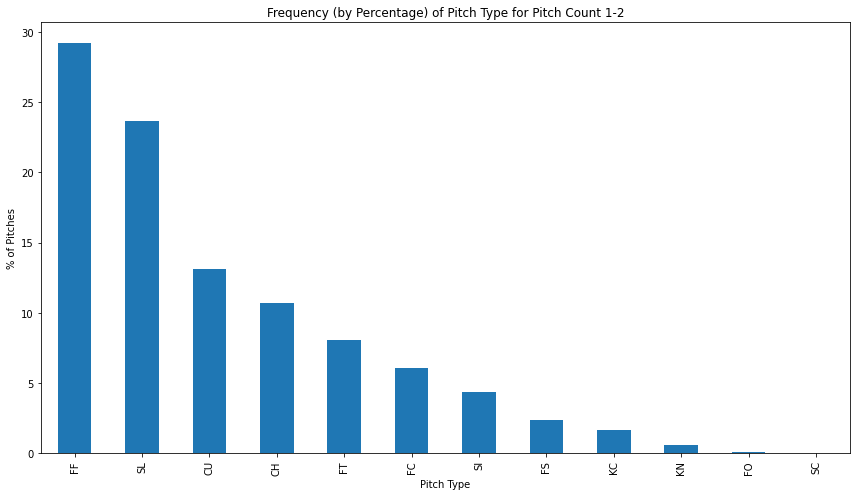

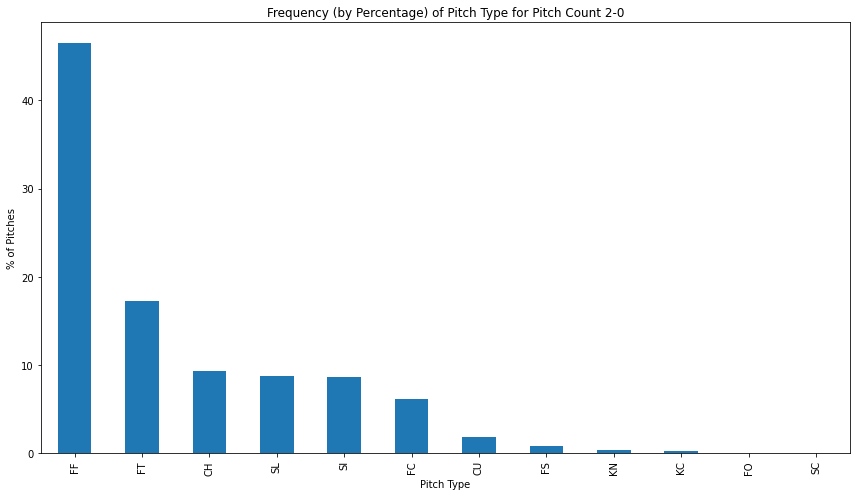

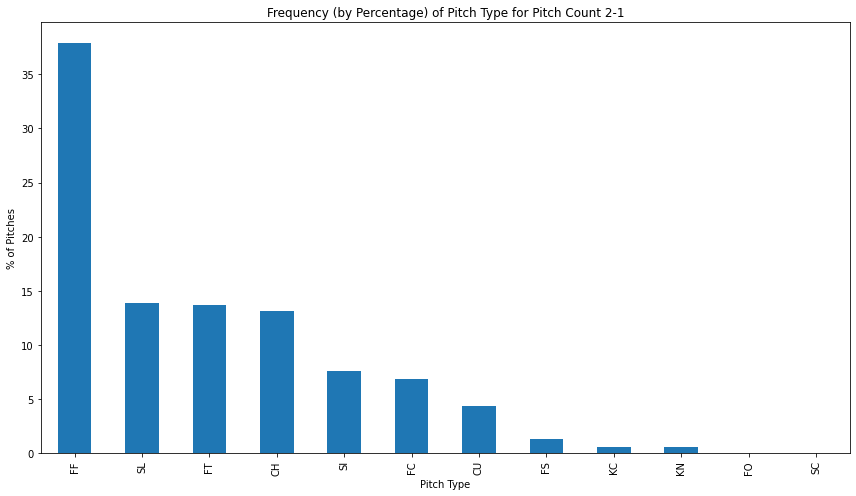

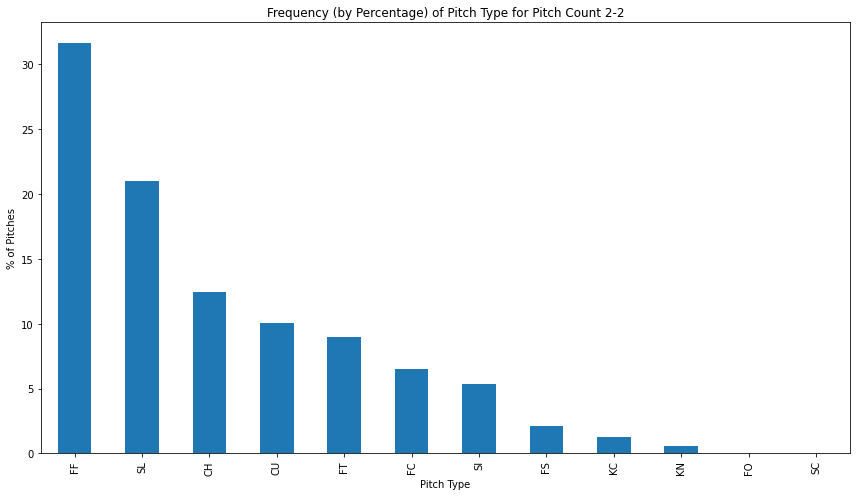

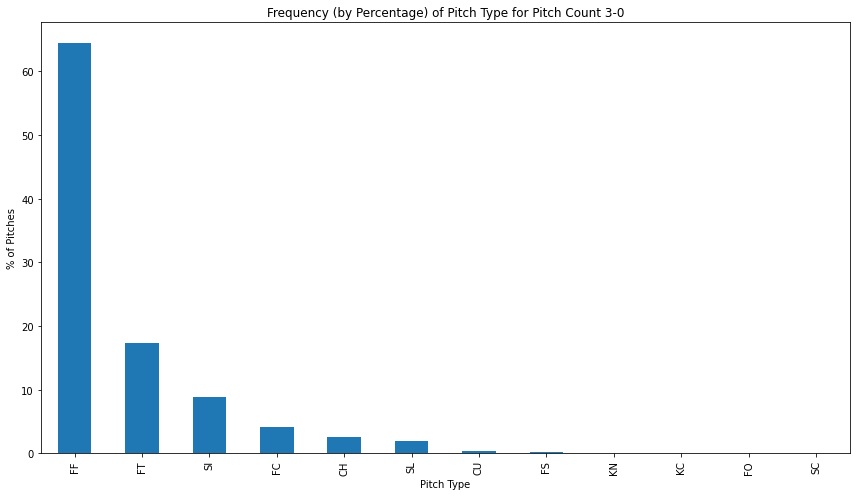

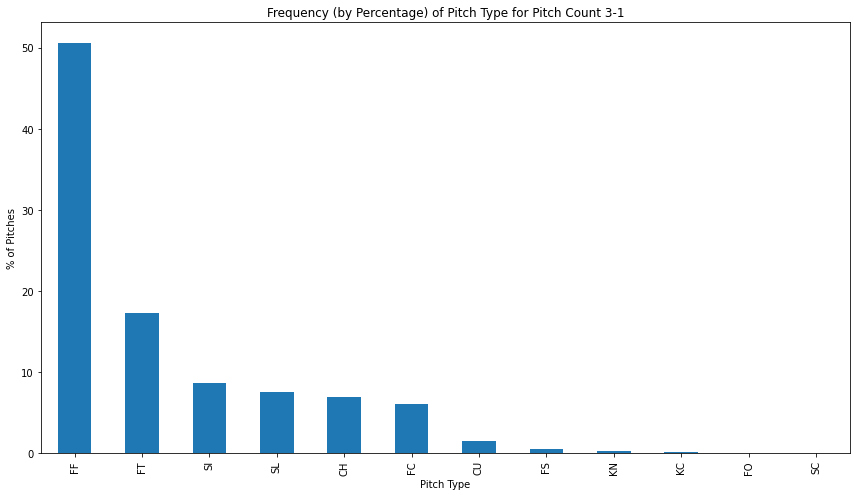

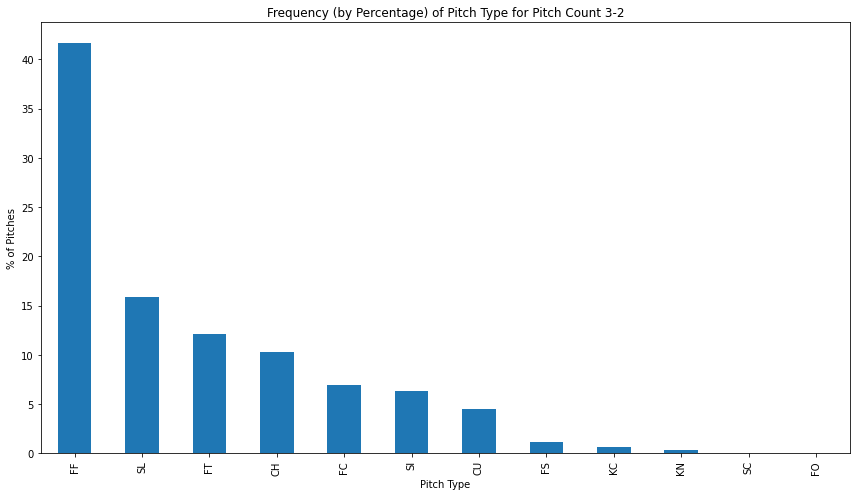

In [22]:
data['pitch_count'] = data['balls'].astype(str) + "-" + data['strikes'].astype(str)
grouped = data.groupby(['pitch_count', 'pitch_type']).size().reset_index(name='counts')
total_pitches = grouped.groupby('pitch_count')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='pitch_count', columns='pitch_type', values='percentage')

# Plots
for pitch_count in pivot_data.index:
    sorted_data = pivot_data.loc[[pitch_count]].T.sort_values(by=pitch_count, ascending=False)
    ax = sorted_data.plot(kind='bar', figsize=(12,7), legend=False)
    plt.title(f'Frequency (by Percentage) of Pitch Type for Pitch Count {pitch_count}')
    plt.ylabel('% of Pitches')
    plt.xlabel('Pitch Type')
    plt.tight_layout()
    plt.show()

### Findings: Slider is rarely used during 3-0 count (4-seam fastball is more common in this situation), while it is used fairly heavily during 0-2 count.

# 5. Analyze Relationship Between Batter/Pitcher Stance and Pitch Type


Create column for combined feature (batter stance + pitcher hand)

In [23]:
data['batter_pitcher_hand'] = data['stand'] + data['p_throws']

## a. Plot frequencies of pitch type for each combo of batter/pitcher stance (stacked)

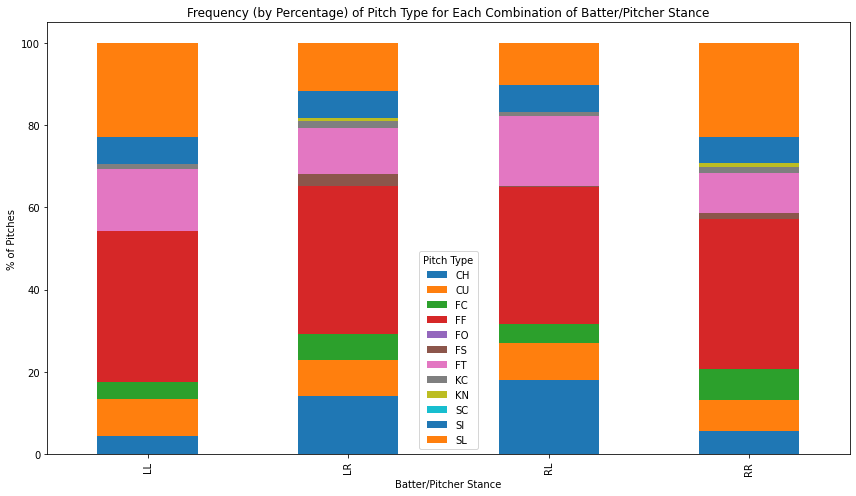

In [24]:
# filtered = data[data['p_throws'] == "R"]
grouped = data.groupby(['batter_pitcher_hand', 'pitch_type']).size().reset_index(name='counts')
total_pitches = grouped.groupby('batter_pitcher_hand')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='batter_pitcher_hand', columns='pitch_type', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type for Each Combination of Batter/Pitcher Stance')
plt.ylabel('% of Pitches')
plt.xlabel('Batter/Pitcher Stance')
plt.legend(title='Pitch Type')
plt.tight_layout()
plt.show()

## b. Create table with % differences comparing opposite side + same side

In [25]:
# Filter the data for each combination of pitcher-batter handedness
ll_data = data[data['batter_pitcher_hand'] == 'LL']
lr_data = data[data['batter_pitcher_hand'] == 'RL']
rr_data = data[data['batter_pitcher_hand'] == 'RR']
rl_data = data[data['batter_pitcher_hand'] == 'LR']

# Calculate pitch type percentages for each combination
ll_percentages = ll_data['pitch_type'].value_counts(normalize=True) * 100
lr_percentages = lr_data['pitch_type'].value_counts(normalize=True) * 100
rr_percentages = rr_data['pitch_type'].value_counts(normalize=True) * 100
rl_percentages = rl_data['pitch_type'].value_counts(normalize=True) * 100

# Create a DataFrame to compare the differences
comparison_df = pd.DataFrame({
    'L-L vs L-R': ll_percentages - lr_percentages,
    'R-R vs R-L': rr_percentages - rl_percentages,
})

# If a pitch type doesn't exist in one of the datasets, it could result in NaN values.
# Fill those NaN values with appropriate values (essentially the value from the non-NaN column)
comparison_df.fillna(0, inplace=True)
comparison_df = comparison_df.style.format("{:+.2f}%")

# Display the comparison table
comparison_df

,L-L vs L-R,R-R vs R-L
CH,-13.46%,-8.56%
CU,-0.17%,-1.07%
FC,-0.39%,+1.21%
FF,+3.26%,+0.46%
FO,+0.00%,-0.06%
FS,-0.13%,-1.35%
FT,-2.07%,-1.52%
KC,+0.33%,-0.26%
KN,+0.00%,+0.15%
SC,-0.01%,-0.02%


### Findngs: main differences are between frequency of sliders and changeups based on whether pitcher and batter have same/opposite hand --- slightly more significant difference when pitcher is left-handed

# 6. Analyze Batting Rates (Swing, Take, Contact, Whiff)

In [26]:
data['zone'].value_counts(dropna=False)

14.0    122084
13.0    112446
11.0    101545
12.0     68309
5.0      36699
4.0      33365
6.0      32820
8.0      30883
9.0      28013
7.0      27484
2.0      25790
1.0      24292
3.0      21690
Name: zone, dtype: int64

In [27]:
data['is_in_zone'] = np.where(data['zone'].isna(), np.nan, np.where(data['zone'].between(1.0, 9.0), 1, 0)).astype(int)

In [28]:
data['type'].value_counts(dropna=False)

S    297994
B    241590
X    125836
Name: type, dtype: int64

In [29]:
swing_values = ["Foul", "Foul (Runner Going)", "Foul Tip", "In play, no out", 
                "In play, out(s)", "In play, run(s)", "Swinging Strike", "Swinging Strike (Blocked)"]

data['is_swing'] = np.where(data['pitch_des'].isin(swing_values), 1, 0).astype(int)

In [30]:
data['is_swing'].value_counts(dropna=False)

0    360760
1    304660
Name: is_swing, dtype: int64

In [31]:
data['is_chased'] = np.where((data['is_swing'] == 1) & (data['is_in_zone'] == 0), 1, 0).astype(int)

In [32]:
data['is_chased'].value_counts(dropna=False)

0    532633
1    132787
Name: is_chased, dtype: int64

In [33]:
contact_values = ["Foul", "Foul (Runner Going)", "Foul Tip", "In play, no out", 
                "In play, out(s)", "In play, run(s)"]
whiff_values = ['Swinging Strike', 'Swinging Strike (Blocked)']

data['is_contact'] = np.where(data['pitch_des'].isin(contact_values), 1, 0).astype(int)
data['is_whiff'] = np.where(data['pitch_des'].isin(whiff_values), 1, 0).astype(int)

## a. Get previous pitch results (in strikezone, swung, chased, contacted, whiffed)

In [34]:
data['was_previous_in_zone'] = data.groupby(['batter_id', 'at_bat_num'])['is_in_zone'].shift(1)
data['was_previous_swung'] = data.groupby(['batter_id', 'at_bat_num'])['is_swing'].shift(1)
data['was_previous_chased'] = data.groupby(['batter_id', 'at_bat_num'])['is_chased'].shift(1)
data['was_previous_contacted'] = data.groupby(['batter_id', 'at_bat_num'])['is_contact'].shift(1)
data['was_previous_whiffed'] = data.groupby(['batter_id', 'at_bat_num'])['is_whiff'].shift(1)

## b. Recompute batting rates iteratively (game-by-game) 

In [35]:
# Initialize empty DataFrames to hold the results
final_batter_rates = pd.DataFrame()

# Iterate over unique dates
for current_date in data['date'].unique():
    # Filter data up to the current date (excluding the current date itself)
    filtered_data = data[data['date'] < current_date]
    if len(filtered_data) > 0:
    
        # Compute metrics for each batter up to the current date
        grouped = filtered_data.groupby(['batter_id', 'pitch_type'])

        # Calculate total swings, inside swings, outside swings, inside takes, outside takes, contact and whiffs
        total_swings = grouped['is_swing'].sum()
        inside_swing = grouped.apply(lambda x: (x['is_swing'] * x['is_in_zone']).sum())
        outside_swing = grouped.apply(lambda x: (x['is_swing'] * (1 - x['is_in_zone'])).sum())
        inside_take = grouped.apply(lambda x: ((1 - x['is_swing']) * x['is_in_zone']).sum())
        outside_take = grouped.apply(lambda x: ((1 - x['is_swing']) * (1 - x['is_in_zone'])).sum())
        contact = grouped['is_contact'].sum()
        whiff = total_swings - contact

        # Calculate the rates
        inside_swing_rate = inside_swing / (inside_swing + inside_take)
        outside_swing_rate = outside_swing / (outside_swing + outside_take)
        inside_take_rate = inside_take / (inside_swing + inside_take)
        outside_take_rate = outside_take / (outside_swing + outside_take)
        contact_rate = contact / total_swings
        whiff_rate = whiff / total_swings

        # Store the results
        temp_df = pd.DataFrame({
            'batter_id': inside_swing.index.get_level_values('batter_id'),
            'pitch_type': inside_swing.index.get_level_values('pitch_type'),
            'inside_swing_rate': inside_swing_rate.values,
            'outside_swing_rate': outside_swing_rate.values,
            'inside_take_rate': inside_take_rate.values,
            'outside_take_rate': outside_take_rate.values,
            'contact_rate': contact_rate.values,
            'whiff_rate': whiff_rate.values
        })
        temp_df['date'] = current_date
        final_batter_rates = pd.concat([final_batter_rates, temp_df], axis=0)
    
# Merge the computed rates back to the original dataframe
data = data.merge(final_batter_rates, how='left', on=['batter_id', 'pitch_type', 'date']).reset_index(drop=True)

# 7. Analyze Distribution of Pitch Types and Relative Chase Rates

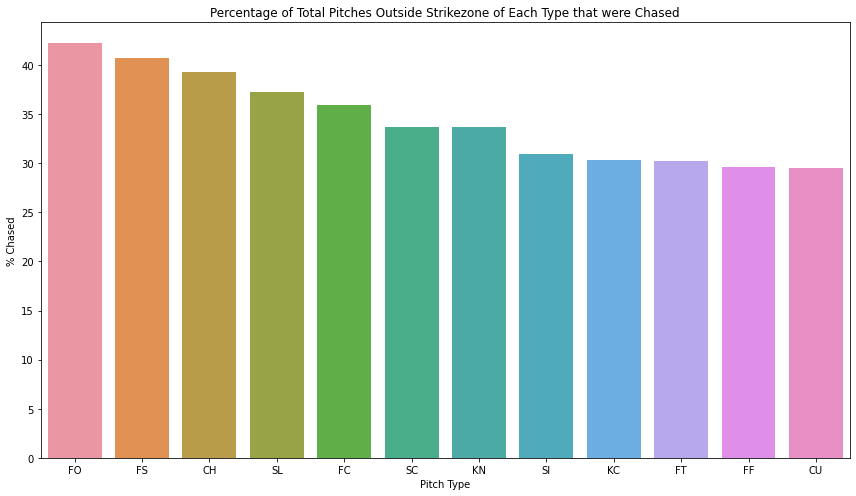

In [36]:
# Calculate total number of each pitch type
outside_strikezone_pitches = data[data['is_in_zone'] == 0]['pitch_type'].value_counts()

# Calculate the number of each pitch type that was chased
chased_pitches = data[data['is_chased'] == 1]['pitch_type'].value_counts()

# Calculate the percentage of each pitch type that was chased
chased_percentage = (chased_pitches / outside_strikezone_pitches) * 100
chased_percentage = chased_percentage.dropna().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,7))
sns.barplot(x=chased_percentage.index, y=chased_percentage.values)
plt.title('Percentage of Total Pitches Outside Strikezone of Each Type that were Chased')
plt.ylabel('% Chased')
plt.xlabel('Pitch Type')
plt.tight_layout()
plt.show()

### Findings: four-seam fastballs are less chased than most other pitch types (easier for batter to track), while the forkball is the most chased (%-wise)

# 8. Group Pitch Types

In [37]:
fastball_codes = ['FF', 'FT', 'SI', 'FO']
breaking_ball_codes = ['SL', 'CU', 'KC', 'SC']
offspeed_codes = ['CH', 'FS', 'KN']

# add in cutter to different group based on velocity

## a. Perform additional analysis on cutter to determine whether it’s a fastball or off speed (by comparing start speed of cutters to that of other fastballs and off-speed pitches)

#### cutter distribution (to see whether to consider fastball or off-speed)

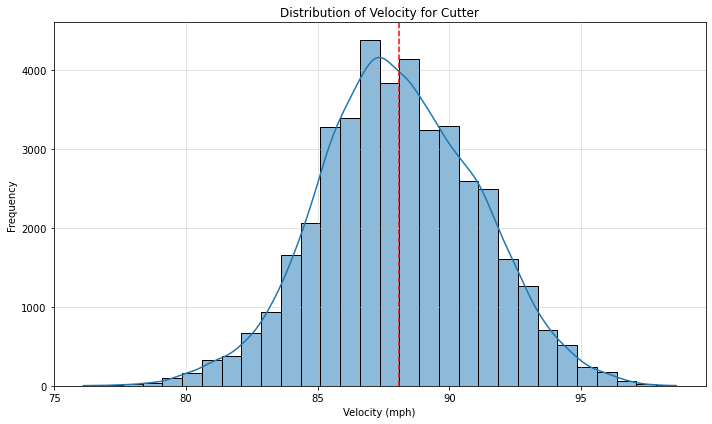

In [38]:
cutter_data = data[data['pitch_type'] == 'FC']
mean_velocity = cutter_data['start_speed'].mean()

# Plot histogram or KDE plot
plt.figure(figsize=(10,6))
sns.histplot(cutter_data['start_speed'], kde=True, bins=30)
plt.axvline(mean_velocity, color='red', linestyle='--', label=f'Mean = {mean_velocity:.2f} mph')
plt.title('Distribution of Velocity for Cutter')
plt.xlabel('Velocity (mph)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

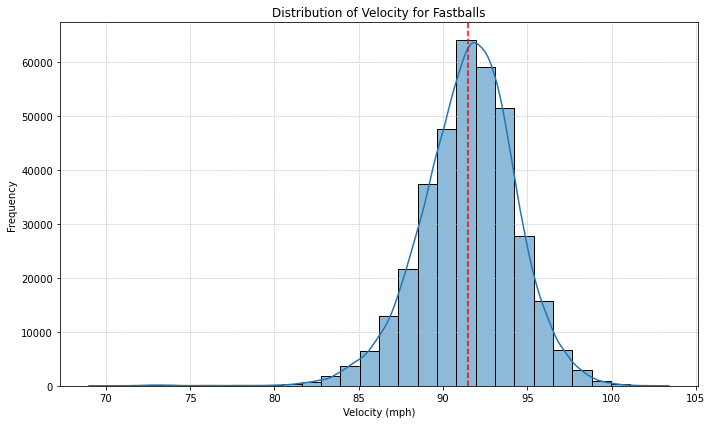

In [39]:
fastball_data = data[data['pitch_type'].isin(fastball_codes)]
mean_velocity = fastball_data['start_speed'].mean()

# Plot histogram or KDE plot
plt.figure(figsize=(10,6))
sns.histplot(fastball_data['start_speed'], kde=True, bins=30)
plt.axvline(mean_velocity, color='red', linestyle='--', label=f'Mean = {mean_velocity:.2f} mph')
plt.title('Distribution of Velocity for Fastballs')
plt.xlabel('Velocity (mph)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

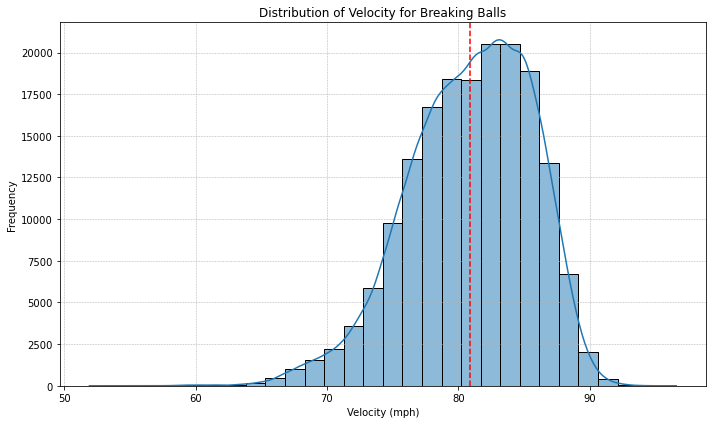

In [40]:
breaking_balls_data = data[data['pitch_type'].isin(breaking_ball_codes)]
mean_velocity = breaking_balls_data['start_speed'].mean()

# Plot histogram or KDE plot
plt.figure(figsize=(10,6))
sns.histplot(breaking_balls_data['start_speed'], kde=True, bins=30)
plt.axvline(mean_velocity, color='red', linestyle='--', label=f'Mean = {mean_velocity:.2f} mph')
plt.title('Distribution of Velocity for Breaking Balls')
plt.xlabel('Velocity (mph)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

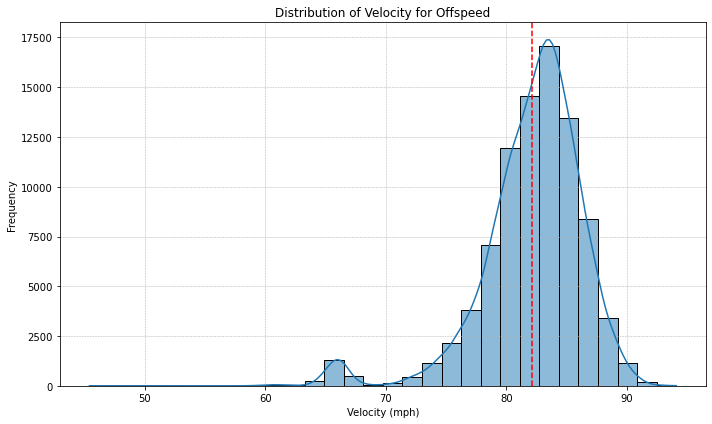

In [41]:
offspeed_data = data[data['pitch_type'].isin(offspeed_codes)]
mean_velocity = offspeed_data['start_speed'].mean()

# Plot histogram or KDE plot
plt.figure(figsize=(10,6))
sns.histplot(offspeed_data['start_speed'], kde=True, bins=30)
plt.axvline(mean_velocity, color='red', linestyle='--', label=f'Mean = {mean_velocity:.2f} mph')
plt.title('Distribution of Velocity for Offspeed')
plt.xlabel('Velocity (mph)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

findings:

In [42]:
fastball_codes.append('FC')
fastball_data = data[data['pitch_type'].isin(fastball_codes)]

## b. Create pitch type group column

In [43]:
data['pitch_type_group'] = np.where(data['pitch_type'].isin(fastball_codes), 'F', np.where(data['pitch_type'].isin(breaking_ball_codes), 'B', 'O'))
data['pitch_type_group'].value_counts(dropna=False)

F    403909
B    174474
O     87037
Name: pitch_type_group, dtype: int64

# 9. Analyze previous pitch types and association with current pitch type (recency)

In [44]:
grouped = data.groupby(['game_pk', 'inning', 'top'])
grouped.tail(1)

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,was_previous_chased,was_previous_contacted,was_previous_whiffed,inside_swing_rate,outside_swing_rate,inside_take_rate,outside_take_rate,contact_rate,whiff_rate,pitch_type_group
13,14143265,286874,2011,2011-03-31,118,108,1,0,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
25,14143277,286874,2011,2011-03-31,108,118,2,1,12,3,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,B
38,14143290,286874,2011,2011-03-31,118,108,2,0,15,5,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,F
50,14143302,286874,2011,2011-03-31,108,118,3,1,18,5,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,O
68,14143320,286874,2011,2011-03-31,118,108,3,0,22,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665360,19838137,317073,2011,2011-10-28,140,138,7,1,58,5,...,0.0,0.0,0.0,0.566524,0.269165,0.433476,0.730835,0.931280,0.068720,F
665384,19838161,317073,2011,2011-10-28,138,140,7,0,64,3,...,0.0,0.0,0.0,0.688525,0.365957,0.311475,0.634043,0.948113,0.051887,F
665395,19838172,317073,2011,2011-10-28,140,138,8,1,67,3,...,0.0,1.0,0.0,0.718354,0.472603,0.281646,0.527397,0.898618,0.101382,F
665408,19838185,317073,2011,2011-10-28,138,140,8,0,70,6,...,0.0,0.0,0.0,0.583333,0.408163,0.416667,0.591837,0.666667,0.333333,O


## a. Create heat map featuring relative frequency of current pitch type given previous pitch type (conditional probability)

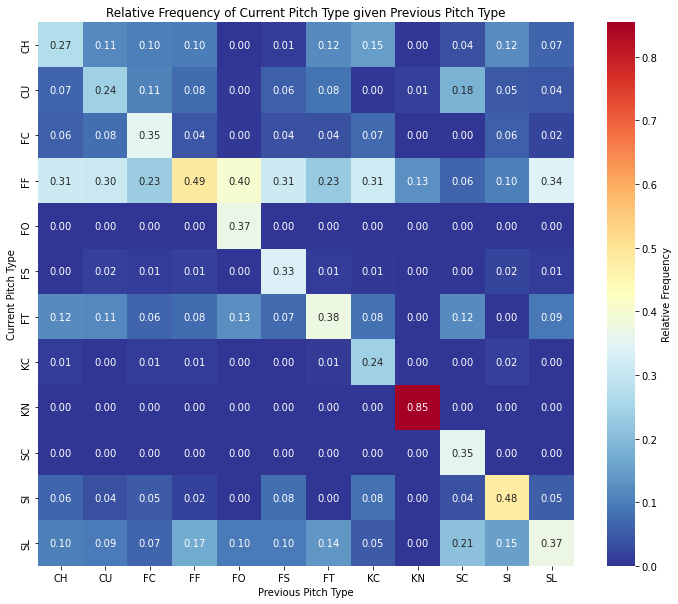

In [45]:
# Create the shifted version of the 'pitch_type' column
data['previous_pitch_1'] = data['pitch_type'].shift(1)

# Create the mask
mask = (data['batter_id'] == data['batter_id'].shift(1)) & (data['at_bat_num'] == data['at_bat_num'].shift(1))

# Apply the mask and set the 'previous_pitch_1' value to NaN for rows that don't meet the criteria
data.loc[~mask, 'previous_pitch_1'] = np.nan

# Counting the combinations of the previous and current pitch types
sequence_counts = data.groupby(['previous_pitch_1', 'pitch_type']).size().reset_index(name='counts')

# Creating a pivot for visualization
pivot_sequence = sequence_counts.pivot_table(index=['previous_pitch_1'], columns='pitch_type', values='counts', fill_value=0)

# Normalizing by the total counts of each previous pitch to get relative frequencies
pivot_sequence = pivot_sequence.divide(pivot_sequence.sum(axis=1), axis=0).T

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_sequence, cmap="RdYlBu_r", annot=True, fmt=".2f", cbar_kws={'label': 'Relative Frequency'})
plt.title("Relative Frequency of Current Pitch Type given Previous Pitch Type")
plt.ylabel("Current Pitch Type")
plt.xlabel("Previous Pitch Type")
plt.show()

### Findings: there may be no pitchers in this dataset who can throw a certain combination of pitch types (ie KC and FO), so conditional probability for transitioning from one to another (ie KC to FO) is zero (or near-zero). For almost all pitch types, the most probable current pitch type is the same as the previous pitch. 

## b. Repeat for last pitch type group

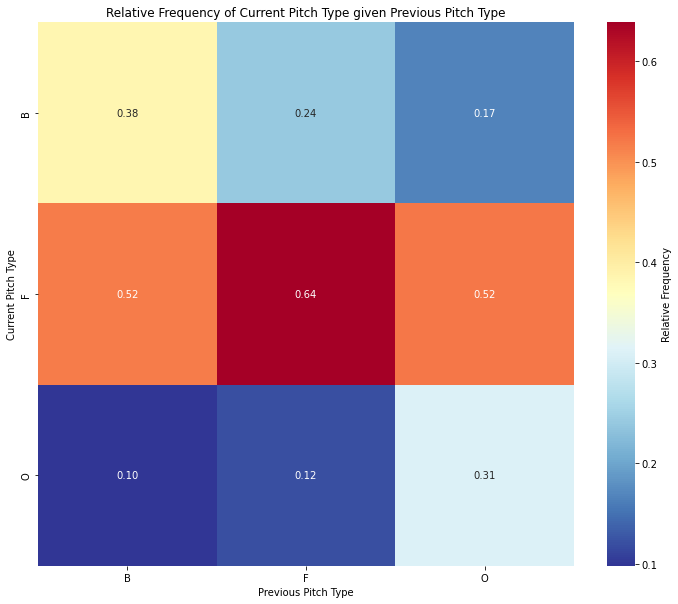

In [46]:
# Create the shifted version of the 'pitch_type' column
data['previous_pitch_group_1'] = data['pitch_type_group'].shift(1)

# Create the mask
mask = (data['batter_id'] == data['batter_id'].shift(1)) & (data['at_bat_num'] == data['at_bat_num'].shift(1))

# Apply the mask and set the 'previous_pitch_1' value to NaN for rows that don't meet the criteria
data.loc[~mask, 'previous_pitch_group_1'] = np.nan

# Counting the combinations of the previous and current pitch types
sequence_counts = data.groupby(['previous_pitch_group_1', 'pitch_type_group']).size().reset_index(name='counts')

# Creating a pivot for visualization
pivot_sequence = sequence_counts.pivot_table(index=['previous_pitch_group_1'], columns='pitch_type_group', values='counts', fill_value=0)

# Normalizing by the total counts of each previous pitch to get relative frequencies
pivot_sequence = pivot_sequence.divide(pivot_sequence.sum(axis=1), axis=0).T

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_sequence, cmap="RdYlBu_r", annot=True, fmt=".2f", cbar_kws={'label': 'Relative Frequency'})
plt.title("Relative Frequency of Current Pitch Type given Previous Pitch Type")
plt.ylabel("Current Pitch Type")
plt.xlabel("Previous Pitch Type")
plt.show()

### Findings: Fastballs are the most probable pitch type group, regardless of previous pitch type groups.

## c. Repeat for last 2 pitch type groups

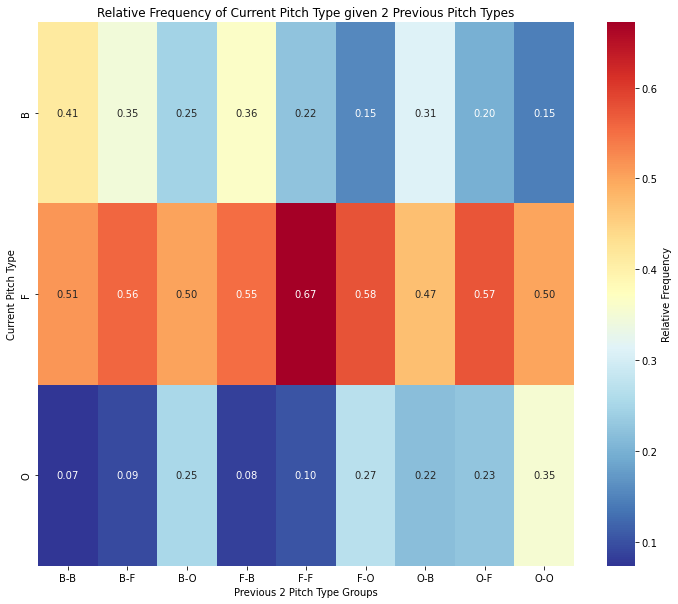

In [47]:
# Create the shifted version of the 'pitch_type' column
data['previous_pitch_2'] = data['pitch_type'].shift(2)
data['previous_pitch_group_2'] = data['pitch_type_group'].shift(2)

# Create the mask
mask = (data['batter_id'] == data['batter_id'].shift(2)) & (data['at_bat_num'] == data['at_bat_num'].shift(2))

# Apply the mask and set the 'previous_pitch_1' value to NaN for rows that don't meet the criteria
data.loc[~mask, 'previous_pitch_2'] = np.nan
data.loc[~mask, 'previous_pitch_group_2'] = np.nan

data['last_two_pitch_groups'] = data['previous_pitch_group_2'] + '-' + data['previous_pitch_group_1']

# Counting the combinations of the previous and current pitch types
sequence_counts = data.groupby(['last_two_pitch_groups', 'pitch_type_group']).size().reset_index(name='counts')

# Creating a pivot for visualization
pivot_sequence = sequence_counts.pivot_table(index=['last_two_pitch_groups'], columns='pitch_type_group', values='counts', fill_value=0)

# Normalizing by the total counts of each previous pitch to get relative frequencies
pivot_sequence = pivot_sequence.divide(pivot_sequence.sum(axis=1), axis=0).T

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_sequence, cmap="RdYlBu_r", annot=True, fmt=".2f", cbar_kws={'label': 'Relative Frequency'})
plt.title("Relative Frequency of Current Pitch Type given 2 Previous Pitch Types")
plt.ylabel("Current Pitch Type")
plt.xlabel("Previous 2 Pitch Type Groups")
plt.show()

### Findings: Fastballs are the most probable pitch type group, regardless of previous 2 pitch types groups.

## d. Plot distribution of pitch types following a strike/ball on a changeup

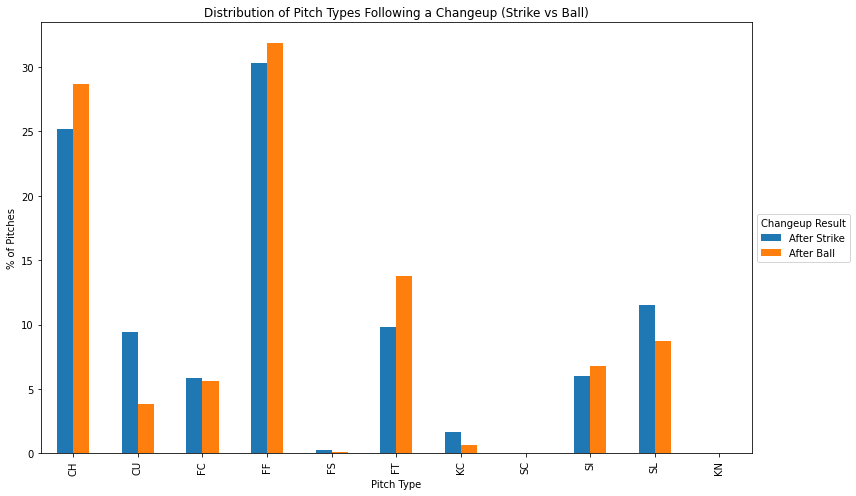

In [48]:
# Get indices where the previous pitch was a changeup that resulted in a strike or ball and occurred in the same at-bat.
strike_after_changeup = data[(data['pitch_type'].shift() == 'CH') & (data['type'].shift() == 'S') & (data['batter_id'] == data['batter_id'].shift()) & (data['game_pk'] == data['game_pk'].shift())]
ball_after_changeup = data[(data['pitch_type'].shift() == 'CH') & (data['type'].shift() == 'B') & (data['batter_id'] == data['batter_id'].shift()) & (data['game_pk'] == data['game_pk'].shift())]

# Group the data to calculate the percentage of each pitch type thrown after a changeup strike or ball.
grouped_strike = strike_after_changeup.groupby('pitch_type').size().reset_index(name='counts')
grouped_ball = ball_after_changeup.groupby('pitch_type').size().reset_index(name='counts')

# Convert counts to percentage
grouped_strike['percentage_strike'] = (grouped_strike['counts'] / grouped_strike['counts'].sum()) * 100
grouped_ball['percentage_ball'] = (grouped_ball['counts'] / grouped_ball['counts'].sum()) * 100

# Merge the two dataframes for easier plotting
merged = pd.merge(grouped_strike[['pitch_type', 'percentage_strike']], grouped_ball[['pitch_type', 'percentage_ball']], on='pitch_type', how='outer').fillna(0)

# Plot
merged.set_index('pitch_type').plot(kind='bar', figsize=(12,7))
plt.title('Distribution of Pitch Types Following a Changeup (Strike vs Ball)')
plt.ylabel('% of Pitches')
plt.xlabel('Pitch Type')
plt.legend(title='Changeup Result', labels=['After Strike', 'After Ball'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### Findings: After pitching a changeup that results in a ball, the pitcher will more often pitch a CH or FF than if the previous pitch resulted in a strike.

## e. Plot distribution of pitch types following a strike on a changeup (for different counts)

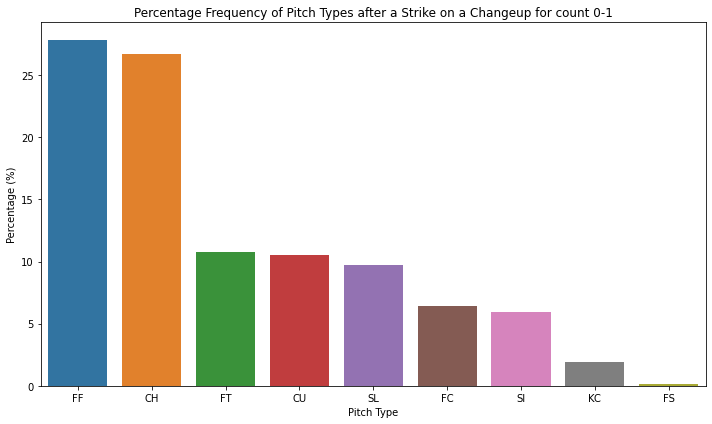

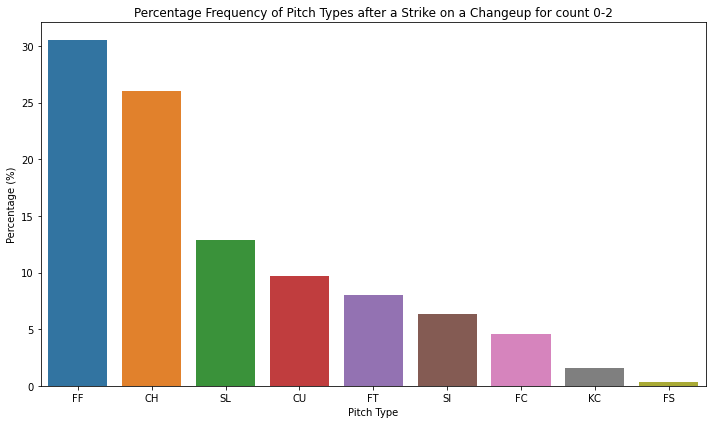

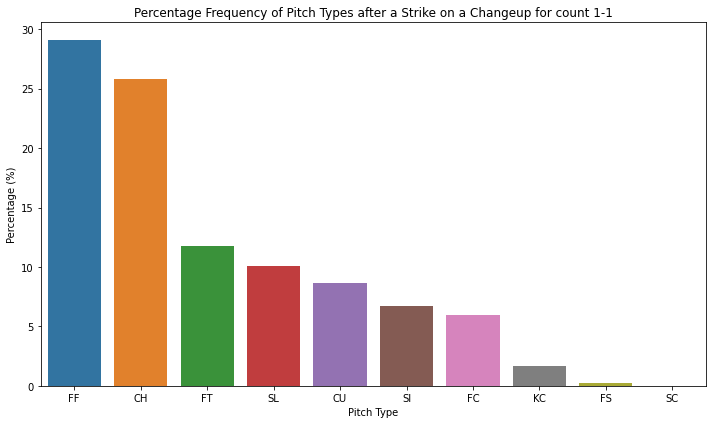

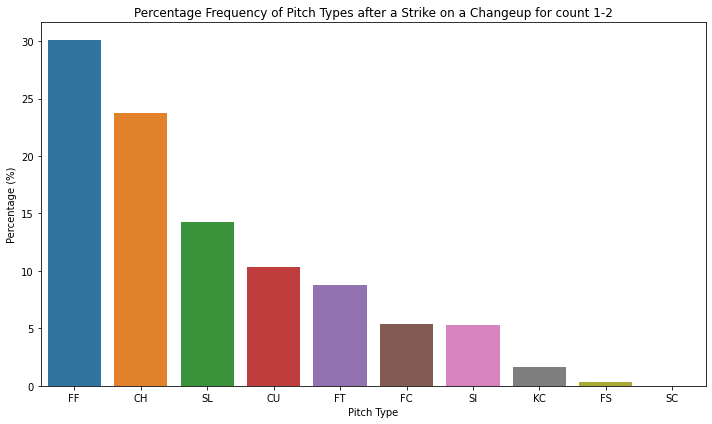

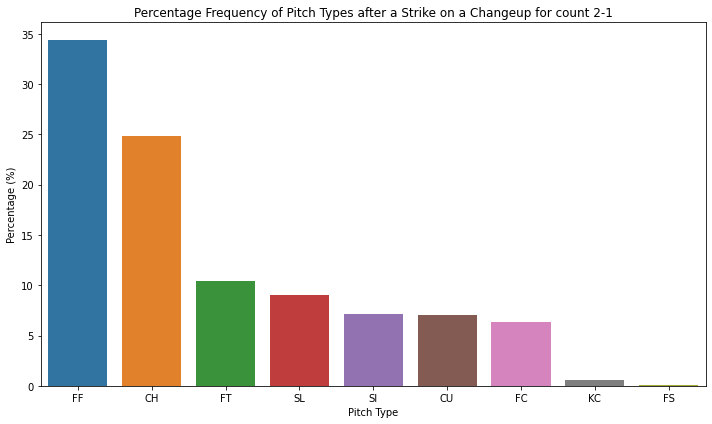

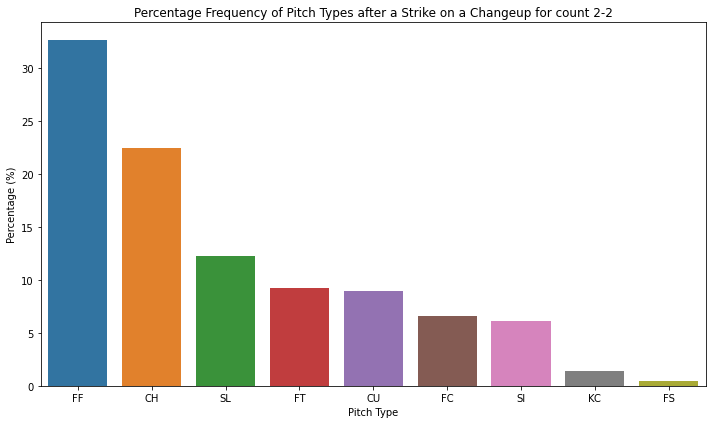

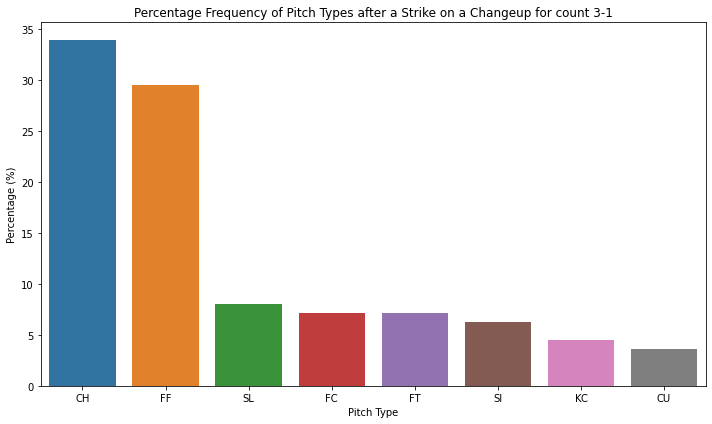

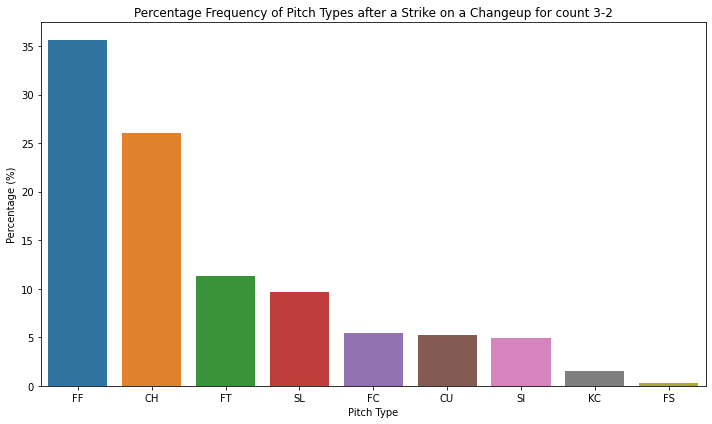

In [49]:
# Get the indices where changeups resulted in a strike
strike_on_changeup_indices = data[(data['pitch_type'] == 'CH') & (data['type'] == 'S') & (data['batter_id'] == data['batter_id'].shift(-1)) & (data['game_pk'] == data['game_pk'].shift(-1))].index

# Get the subsequent pitches
subsequent_pitches = data.loc[strike_on_changeup_indices + 1]

# Group by pitch count and pitch type, then count occurrences
grouped_data = subsequent_pitches.groupby(['pitch_count', 'pitch_type']).size().reset_index(name='counts')

# Calculate percentage frequencies for each group
grouped_data['percentage'] = grouped_data.groupby('pitch_count')['counts'].apply(lambda x: x / x.sum() * 100)

# Unique pitch counts
unique_counts = grouped_data['pitch_count'].unique()

for count in unique_counts:
    count_data = grouped_data[grouped_data['pitch_count'] == count]
    # Sort by percentage in descending order
    count_data = count_data.sort_values(by='percentage', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='pitch_type', y='percentage', data=count_data)
    plt.title(f'Percentage Frequency of Pitch Types after a Strike on a Changeup for count {count}')
    plt.xlabel('Pitch Type')
    plt.ylabel('Percentage (%)')
    plt.tight_layout()
    plt.show()

## f. Plot distribution of pitch types following a ball on a changeup (for different counts)

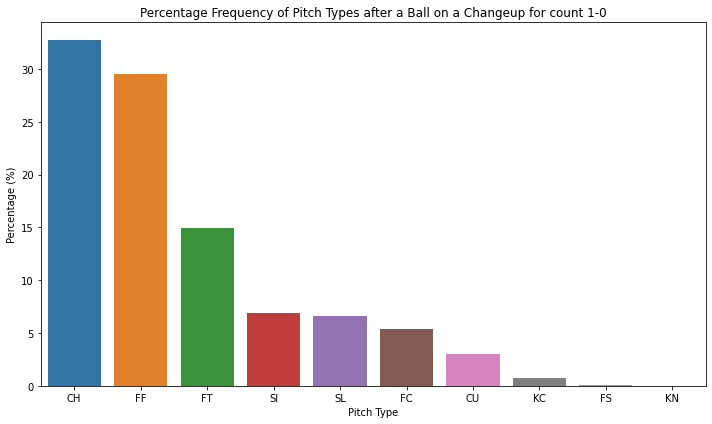

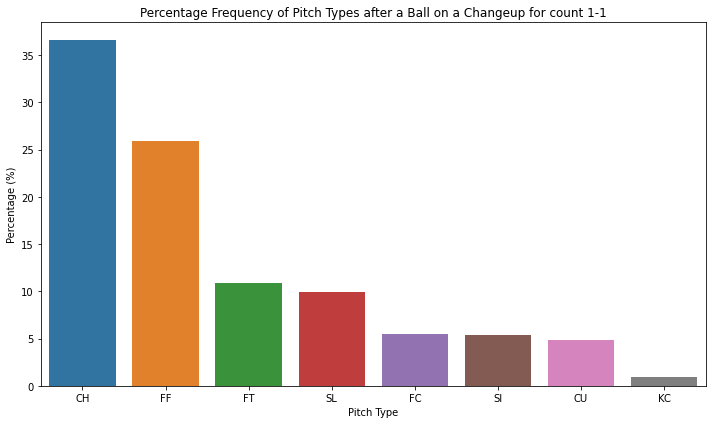

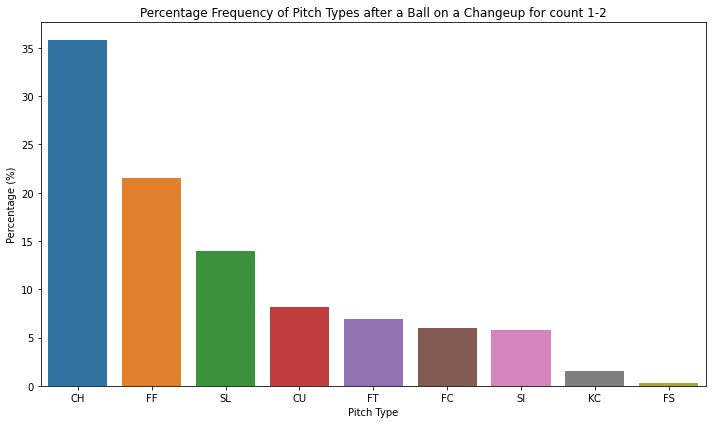

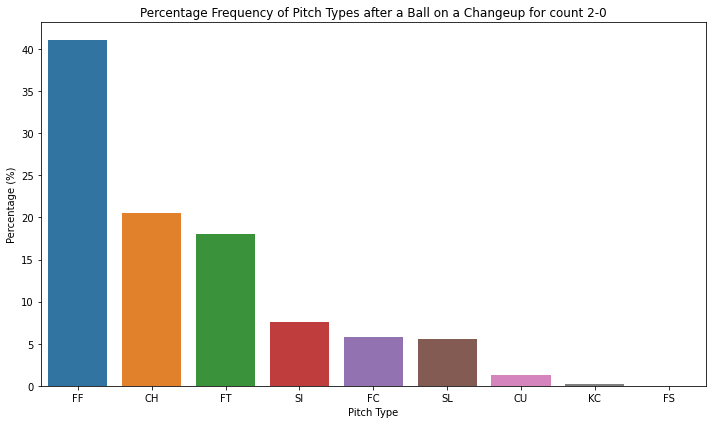

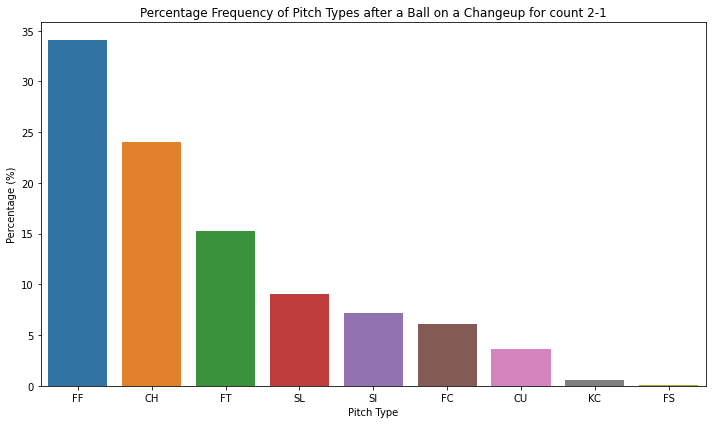

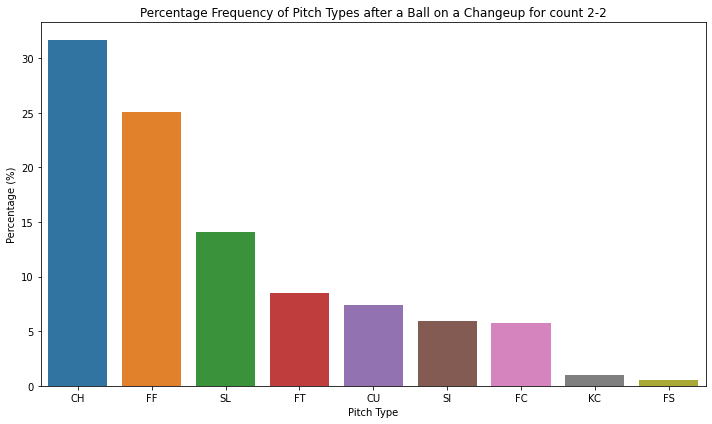

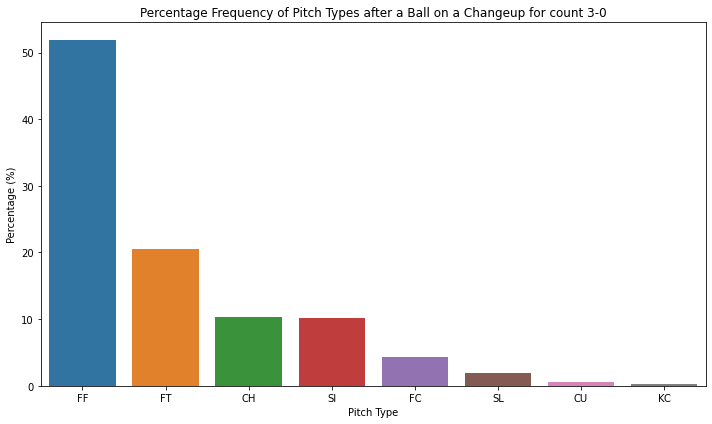

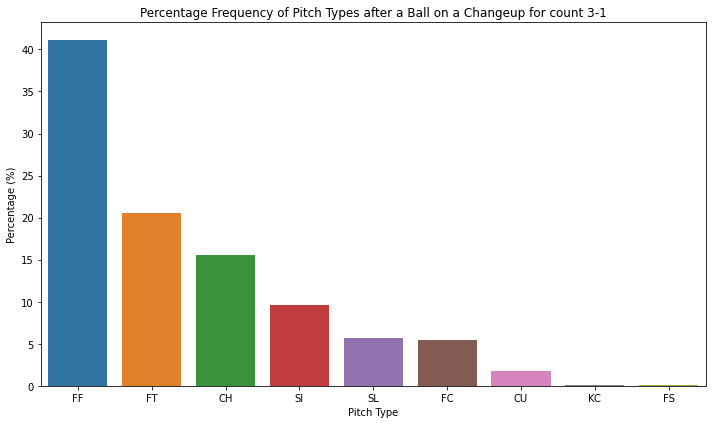

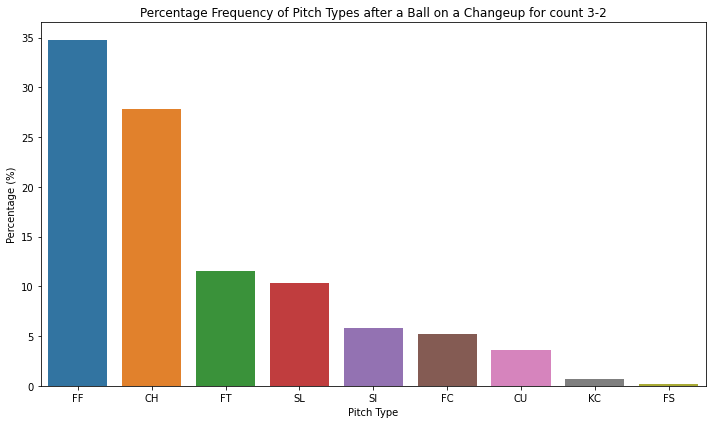

In [50]:
# Get the indices where changeups resulted in a ball
ball_on_changeup_indices = data[(data['pitch_type'] == 'CH') & (data['type'] == 'B') & (data['batter_id'] == data['batter_id'].shift(-1))].index

# Get the subsequent pitches
subsequent_pitches = data.loc[ball_on_changeup_indices + 1]

# Group by pitch count and pitch type, then count occurrences
grouped_data = subsequent_pitches.groupby(['pitch_count', 'pitch_type']).size().reset_index(name='counts')

# Calculate percentage frequencies for each group
grouped_data['percentage'] = grouped_data.groupby('pitch_count')['counts'].apply(lambda x: x / x.sum() * 100)

# Unique pitch counts
unique_counts = grouped_data['pitch_count'].unique()

for count in unique_counts:
    count_data = grouped_data[grouped_data['pitch_count'] == count]
    # Sort by percentage in descending order
    count_data = count_data.sort_values(by='percentage', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='pitch_type', y='percentage', data=count_data)
    plt.title(f'Percentage Frequency of Pitch Types after a Ball on a Changeup for count {count}')
    plt.xlabel('Pitch Type')
    plt.ylabel('Percentage (%)')
    plt.tight_layout()
    plt.show()


# 10. Analyze effect of runner on base on pitch type

In [51]:
data['is_on_base'] = np.where(data['on_1b'].notna() | data['on_2b'].notna() | data['on_3b'].notna(), 1, 0)

In [52]:
data['is_on_base'].value_counts(dropna=False)

0    380308
1    285112
Name: is_on_base, dtype: int64

## a. Plot comparison between different pitch type (and pitch type group) frequency with runners on base/empty bases

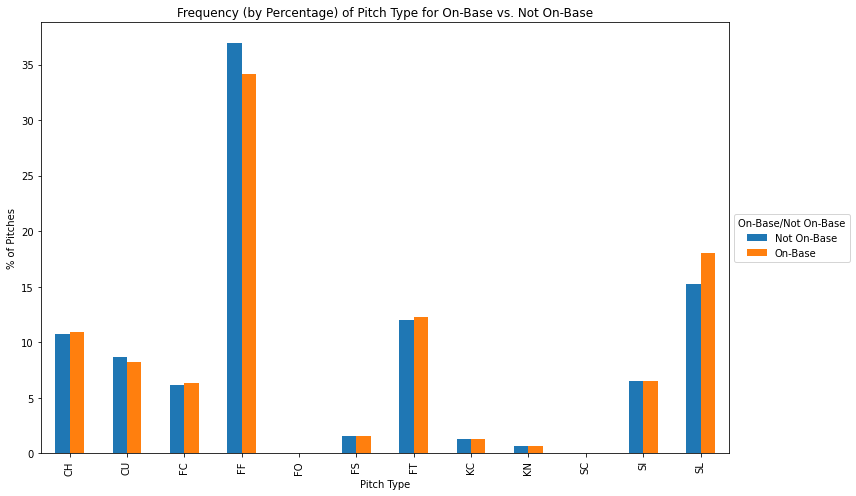

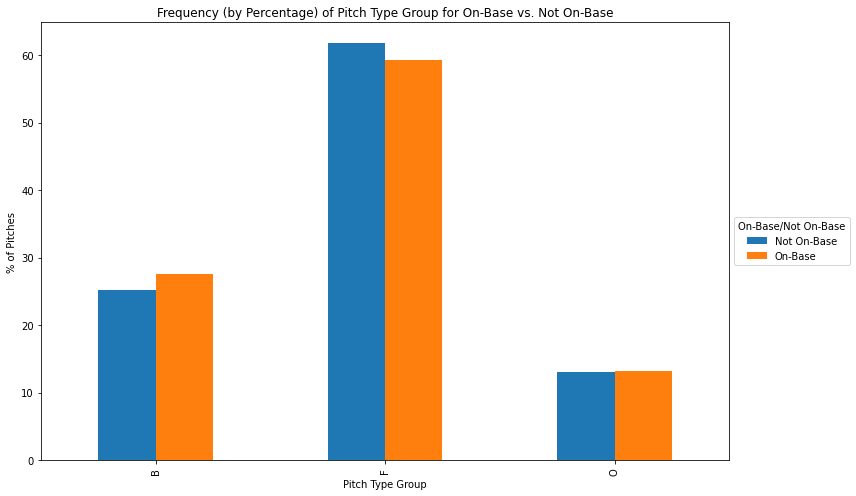

In [53]:
# INDIVIDUAL PITCH TYPES
grouped = data.groupby(['is_on_base', 'pitch_type']).size().reset_index(name='counts')
total_pitches = grouped.groupby('is_on_base')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='pitch_type', columns='is_on_base', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=False, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type for On-Base vs. Not On-Base')
plt.ylabel('% of Pitches')
plt.xlabel('Pitch Type')
plt.legend(title='On-Base/Not On-Base', labels=['Not On-Base', 'On-Base'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# PITCH TYPE GROUPS
grouped = data.groupby(['is_on_base', 'pitch_type_group']).size().reset_index(name='counts')
total_pitches = grouped.groupby('is_on_base')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='pitch_type_group', columns='is_on_base', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=False, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type Group for On-Base vs. Not On-Base')
plt.ylabel('% of Pitches')
plt.xlabel('Pitch Type Group')
plt.legend(title='On-Base/Not On-Base', labels=['Not On-Base', 'On-Base'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### Findings: having runners on base doesn't really seem to draw pitchers away from pitching breaking balls that may "run away" from the catcher (MLB pitchers are too good, so doesn't matter)

# 11. Analyze effect of inning # on pitch type

In [54]:
data['inning'].value_counts(dropna=False)

1     77627
3     73947
2     73745
4     73567
6     73554
8     73490
7     73469
5     72827
9     59026
10     6813
11     3583
12     1849
13     1008
14      555
15      138
16       83
18       50
19       46
17       43
Name: inning, dtype: int64

### Not enough pitch data for later columns, so group them

In [55]:
data['inning_adj'] = data['inning'].apply(lambda x: x if 1 <= x <= 13 else '14+')

## a. Plot distribution of pitch types by inning (stacked)

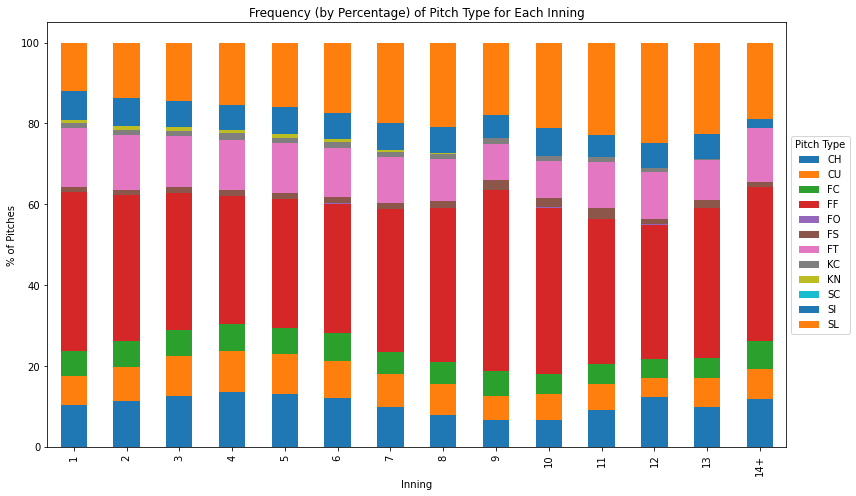

In [56]:
# INDIVIDUAL PITCH TYPES
grouped = data.groupby(['inning_adj', 'pitch_type']).size().reset_index(name='counts')
total_pitches = grouped.groupby('inning_adj')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='inning_adj', columns='pitch_type', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type for Each Inning')
plt.ylabel('% of Pitches')
plt.xlabel('Inning')
plt.legend(title='Pitch Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### Findings: Sliders generally used more heavily as the game progresses.

## b. Plot distribution of pitch type groups by inning (stacked)

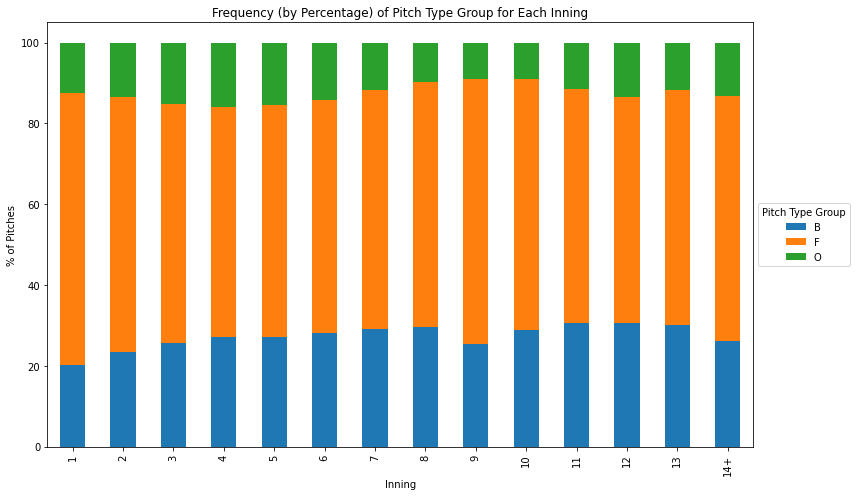

In [57]:
# PITCH TYPE GROUPS
grouped = data.groupby(['inning_adj', 'pitch_type_group']).size().reset_index(name='counts')
total_pitches = grouped.groupby('inning_adj')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='inning_adj', columns='pitch_type_group', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type Group for Each Inning')
plt.ylabel('% of Pitches')
plt.xlabel('Inning')
plt.legend(title='Pitch Type Group', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### Findings: Increased amount of breaking balls as game progresses.

# 12. Analyze relationship between Starter/Reliever on Pitch Type

In [58]:
# Identify starting pitchers
starting_pitchers = data.groupby(['game_pk', 'team_id_p']).first().reset_index()

# Create a binary column for starters
data['is_starter'] = data['pitcher_id'].isin(starting_pitchers['pitcher_id']).astype(int)

## a. Plot distribution of pitch types (and pitch type groups) given starter/reliever

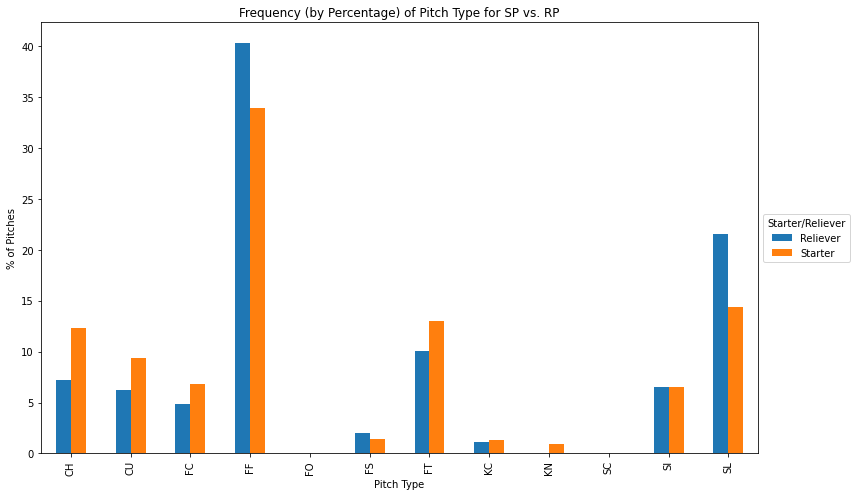

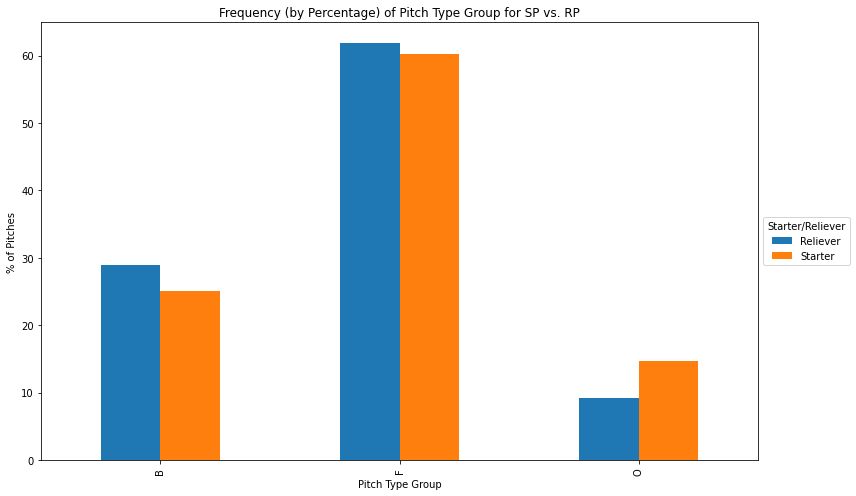

In [59]:
# INDIVIDUAL PITCH TYPES
grouped = data.groupby(['is_starter', 'pitch_type']).size().reset_index(name='counts')
total_pitches = grouped.groupby('is_starter')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='pitch_type', columns='is_starter', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=False, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type for SP vs. RP')
plt.ylabel('% of Pitches')
plt.xlabel('Pitch Type')
plt.legend(title='Starter/Reliever', labels=['Reliever', 'Starter'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# PITCH TYPE GROUPS
grouped = data.groupby(['is_starter', 'pitch_type_group']).size().reset_index(name='counts')
total_pitches = grouped.groupby('is_starter')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='pitch_type_group', columns='is_starter', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=False, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type Group for SP vs. RP')
plt.ylabel('% of Pitches')
plt.xlabel('Pitch Type Group')
plt.legend(title='Starter/Reliever', labels=['Reliever', 'Starter'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# 13. Compute Pitcher Historical Pitch Distribution Iteratively (By Game)

using game date instead of game id just in case game id isnt sorted properly

In [60]:
data['date'] = pd.to_datetime(data['date'])

# Sort the data by date
data = data.sort_values(by=['date'])

# Initialize empty DataFrames to hold the results
final_pitch_distributions = pd.DataFrame()
final_pitch_totals = pd.DataFrame()

# Iterate over unique dates
for current_date in data['date'].unique():
    # Filter data up to the current date
    filtered_data = data[data['date'] < current_date]
    
    # Compute pitch frequencies for each pitcher up to the current date
    pitcher_frequencies = filtered_data.groupby(['pitcher_id', 'pitch_type']).size().unstack(fill_value=0)
    pitcher_frequencies['total_pitches_thrown'] = pitcher_frequencies.sum(axis=1)
    
    # Compute the distribution
    pitcher_totals = pitcher_frequencies['total_pitches_thrown']
    pitch_distributions = pitcher_frequencies.divide(pitcher_totals, axis=0).drop(columns='total_pitches_thrown')
    pitch_distributions = pitch_distributions.add_prefix('pitcher_rate_')
    
    # Store the results
    pitch_distributions['date'] = current_date
    final_pitch_distributions = pd.concat([final_pitch_distributions, pitch_distributions], axis=0)
    
    pitcher_totals = pitcher_totals.to_frame().reset_index()
    pitcher_totals.columns = ['pitcher_id', 'total_pitches_thrown']
    pitcher_totals['date'] = current_date
    final_pitch_totals = pd.concat([final_pitch_totals, pitcher_totals], axis=0)

# Merge the computed distributions and totals back to the original dataframe
data = data.merge(final_pitch_distributions, how='left', on=['pitcher_id', 'date'])
data = data.merge(final_pitch_totals, how='left', on=['pitcher_id', 'date']).reset_index(drop=True)

In [61]:
data

,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,...,pitcher_rate_FF,pitcher_rate_FT,pitcher_rate_KC,pitcher_rate_KN,pitcher_rate_SI,pitcher_rate_SL,pitcher_rate_FS,pitcher_rate_FO,pitcher_rate_SC,total_pitches_thrown
0,14143252,286874,2011,2011-03-31,118,108,1,0,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14148825,286878,2011,2011-03-31,138,135,1,0,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14148824,286878,2011,2011-03-31,138,135,1,0,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14148823,286878,2011,2011-03-31,138,135,1,0,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14148822,286878,2011,2011-03-31,138,135,1,0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665415,19838021,317073,2011,2011-10-28,140,138,4,1,30,1,...,0.241140,0.000000,0.0,0.0,0.036171,0.0000,0.0,0.0,0.0,2737.0
665416,19838025,317073,2011,2011-10-28,140,138,4,1,31,1,...,0.241140,0.000000,0.0,0.0,0.036171,0.0000,0.0,0.0,0.0,2737.0
665417,19838026,317073,2011,2011-10-28,140,138,4,1,31,2,...,0.241140,0.000000,0.0,0.0,0.036171,0.0000,0.0,0.0,0.0,2737.0
665418,19838030,317073,2011,2011-10-28,138,140,4,0,32,1,...,0.260359,0.381571,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,3234.0


### Gives us the pitch distributions of each pitcher using the information prior to the current game.

# 14. Compute Batter Historical Pitch Distribution Iteratively (By Game)

In [62]:
# Sort the data by date
data = data.sort_values(by=['date'])

# Initialize empty DataFrames to hold the results
final_pitch_distributions = pd.DataFrame()
final_pitch_totals = pd.DataFrame()

# Iterate over unique dates
for current_date in data['date'].unique():
    # Filter data up to the current date
    filtered_data = data[data['date'] < current_date]
    
    # Compute pitch frequencies for each pitcher up to the current date
    pitcher_frequencies = filtered_data.groupby(['batter_id', 'pitch_type']).size().unstack(fill_value=0)
    pitcher_frequencies['total_pitches_received'] = pitcher_frequencies.sum(axis=1)
    
    # Compute the distribution
    pitcher_totals = pitcher_frequencies['total_pitches_received']
    pitch_distributions = pitcher_frequencies.divide(pitcher_totals, axis=0).drop(columns='total_pitches_received')
    pitch_distributions = pitch_distributions.add_prefix('batter_rate_')
    
    # Store the results
    pitch_distributions['date'] = current_date
    final_pitch_distributions = pd.concat([final_pitch_distributions, pitch_distributions], axis=0)
    
    pitcher_totals = pitcher_totals.to_frame().reset_index()
    pitcher_totals.columns = ['batter_id', 'total_pitches_received']
    pitcher_totals['date'] = current_date
    final_pitch_totals = pd.concat([final_pitch_totals, pitcher_totals], axis=0)

# Merge the computed distributions and totals back to the original dataframe
data = data.merge(final_pitch_distributions, how='left', on=['batter_id', 'date'])
data = data.merge(final_pitch_totals, how='left', on=['batter_id', 'date']).reset_index(drop=True)


### Gives us the pitch distributions faced by each batter using the information prior to the current game.

# 15. Analyze relationship between batting position and pitch types

## a. My predictions
### Leadoff Hitters (1st position):
- Typically chosen for their ability to get on base and set the table for the middle of the lineup.
- Might see more fastballs, as pitchers aim to start the inning with a strike and not give up a walk.
- A pitcher may also pitch more carefully to prevent giving up an early hit or walk.

### 2nd Position:
- Often good contact hitters who can hit behind the runner and are proficient in hitting-and-run situations.
- May see a mix of pitches, as pitchers might try to induce a ground ball or avoid giving up a hit that advances the leadoff hitter.

### Middle Order (3rd, 4th, and 5th positions):
- These are typically the team's best power hitters.
- Pitchers are likely to be more cautious, often throwing breaking balls or off-speed pitches to avoid giving up home runs or extra-base hits.
- The cleanup hitter (4th) especially might not see many good fastballs, especially in high-leverage situations.

### Bottom of the Order (6th to 8th positions):
- These hitters might not be as offensively skilled as the middle order.
- Depending on the situation, pitchers might be more aggressive, throwing more fastballs.
- Conversely, in the National League, the 8th batter might see more off-speed pitches if the pitcher is on deck, as a walk to the 8th batter can lead to an easier out with the pitcher batting next.

### Pitcher (in the National League):
- Typically not a strong hitter.
- Might see a lot of fastballs, as most pitchers aren't great hitters against them.
- However, some pitchers can hit, so the approach may vary based on the specific pitcher's hitting abilities.

### Assign 1-9 batting order for players, if player subs in, his value will be 0

In [63]:
# Ensure data is sorted by game and at bat number
data_sorted = data.sort_values(by=['game_pk', 'at_bat_num'])

# Function to assign batting order for the first 9 unique batters
def assign_batting_position(group):
    # Get unique batters for the first 9 at-bats
    unique_batters = group['batter_id'].drop_duplicates()[:9]
    
    # Map the original dataframe's batter_id to their batting order
    group['batting_position'] = group['batter_id'].map({id: order for order, id in enumerate(unique_batters, 1)})
    
    return group

# Apply the function to each game and team
data_sorted = data_sorted.groupby(['game_pk', 'team_id_b']).apply(assign_batting_position)

# Fill NaN values with a placeholder (e.g., 0)
data['batting_position'] = data_sorted['batting_position'].fillna(0)

# Convert to integer
data['batting_position'] = data['batting_position'].astype(int)

## a. Plot distribution of pitch types (and pitch type groups) given batting position

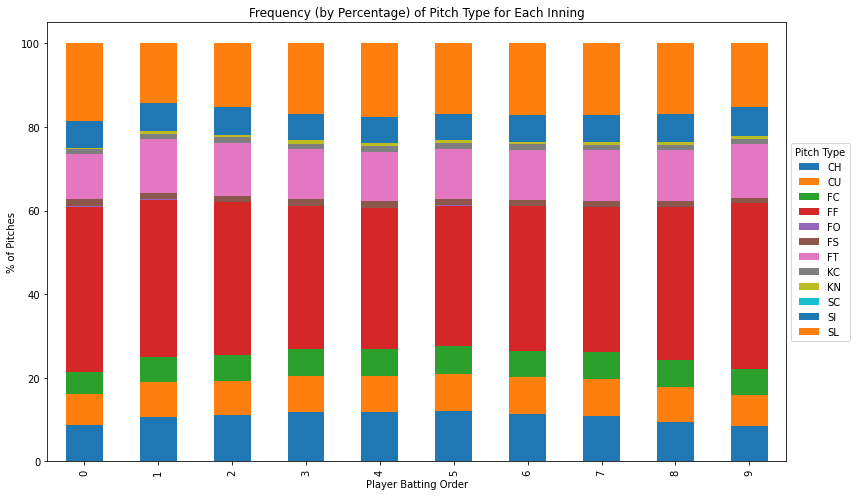

In [64]:
# INDIVIDUAL PITCH TYPES
grouped = data.groupby(['batting_position', 'pitch_type']).size().reset_index(name='counts')
total_pitches = grouped.groupby('batting_position')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='batting_position', columns='pitch_type', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type for Each Inning')
plt.ylabel('% of Pitches')
plt.xlabel('Player Batting Order')
plt.legend(title='Pitch Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

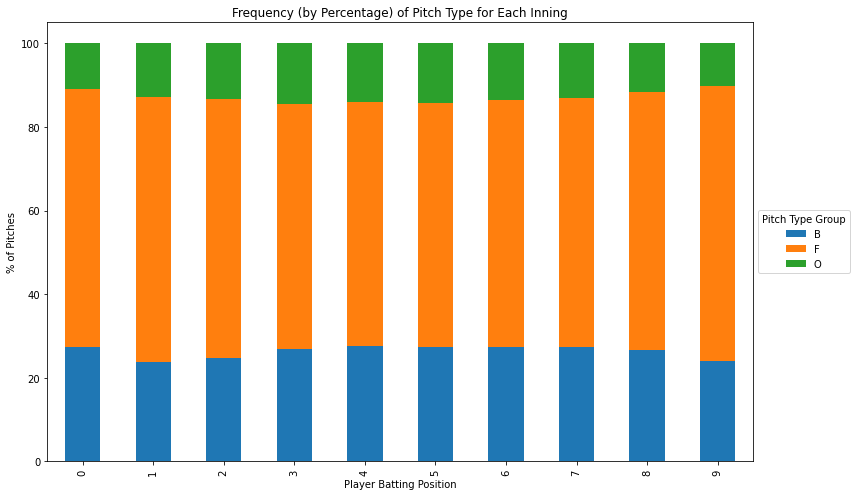

In [65]:
# PITCH TYPE GROUPS
grouped = data.groupby(['batting_position', 'pitch_type_group']).size().reset_index(name='counts')
total_pitches = grouped.groupby('batting_position')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='batting_position', columns='pitch_type_group', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type for Each Inning')
plt.ylabel('% of Pitches')
plt.xlabel('Player Batting Position')
plt.legend(title='Pitch Type Group', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### Findings: more offspeed pitches thrown to batters in middle of lineup, which is consistent with expectations

## b. Plot relationship between batting position and pitch speed (only using IQR)

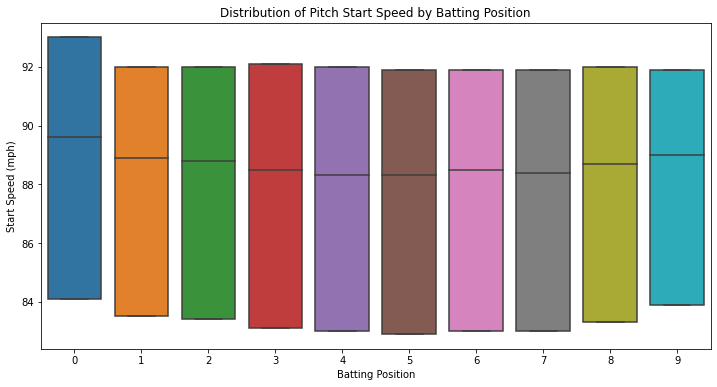

In [66]:
# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='batting_position', y='start_speed', data=data, showfliers=False, whis=0)

# Add titles and labels
plt.title("Distribution of Pitch Start Speed by Batting Position")
plt.xlabel("Batting Position")
plt.ylabel("Start Speed (mph)")
plt.show()

## c. Plot relationship between proportion of pitch types (and pitch type groups) for pitchers vs. position players

In [67]:
# Extract unique pitcher IDs
pitcher_ids = set(data['pitcher_id'].unique())

# Create the 'is_pitcher' column
data['is_pitcher'] = data['batter_id'].apply(lambda x: 1 if x in pitcher_ids else 0)

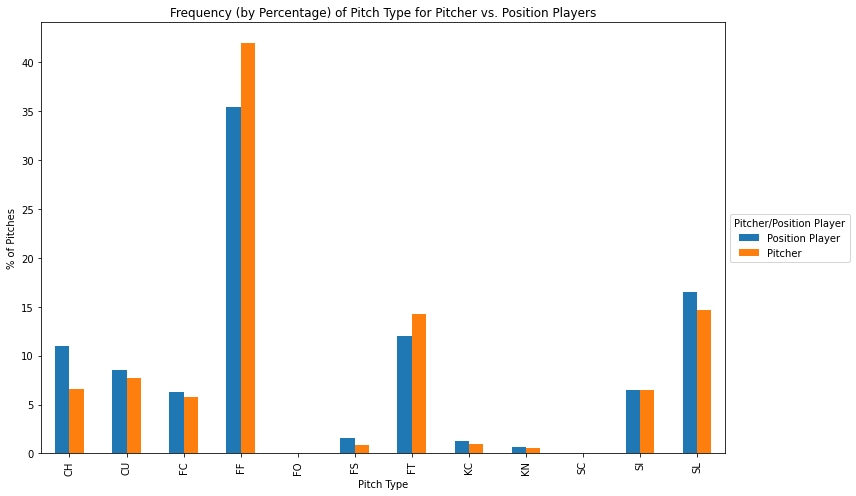

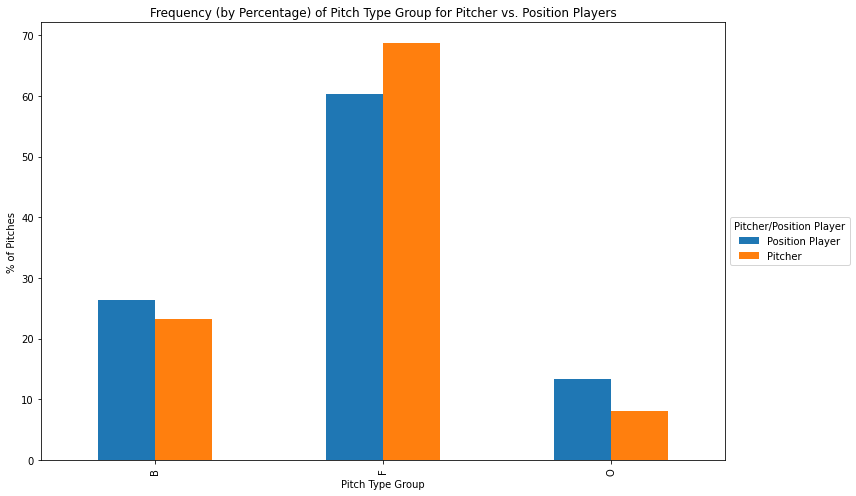

In [68]:
# INDIVIDUAL PITCH TYPES
grouped = data.groupby(['is_pitcher', 'pitch_type']).size().reset_index(name='counts')
total_pitches = grouped.groupby('is_pitcher')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='pitch_type', columns='is_pitcher', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=False, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type for Pitcher vs. Position Players')
plt.ylabel('% of Pitches')
plt.xlabel('Pitch Type')
plt.legend(title='Pitcher/Position Player', labels=['Position Player', 'Pitcher'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# PITCH TYPE GROUPS
grouped = data.groupby(['is_pitcher', 'pitch_type_group']).size().reset_index(name='counts')
total_pitches = grouped.groupby('is_pitcher')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='pitch_type_group', columns='is_pitcher', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=False, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type Group for Pitcher vs. Position Players')
plt.ylabel('% of Pitches')
plt.xlabel('Pitch Type Group')
plt.legend(title='Pitcher/Position Player', labels=['Position Player', 'Pitcher'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### Findings: As predicted, pitchers receive more fastballs than position players.

# 16. Analyze relationship between pitch types and pitch count for current at-bat

In [69]:
data['pcount_at_bat'].value_counts(dropna=False)

1     172706
2     154772
3     126541
4      94602
5      61722
6      32860
7      13615
8       5414
9       1988
10       771
11       273
12       103
13        31
14        13
15         6
16         3
Name: pcount_at_bat, dtype: int64

In [70]:
data['pcount_at_bat_adj'] = data['pcount_at_bat'].apply(lambda x: x if 1 <= x <= 10 else '11+')

## a. Plot distribution of pitch types (and pitch type groups) given pitch count for current at-bat

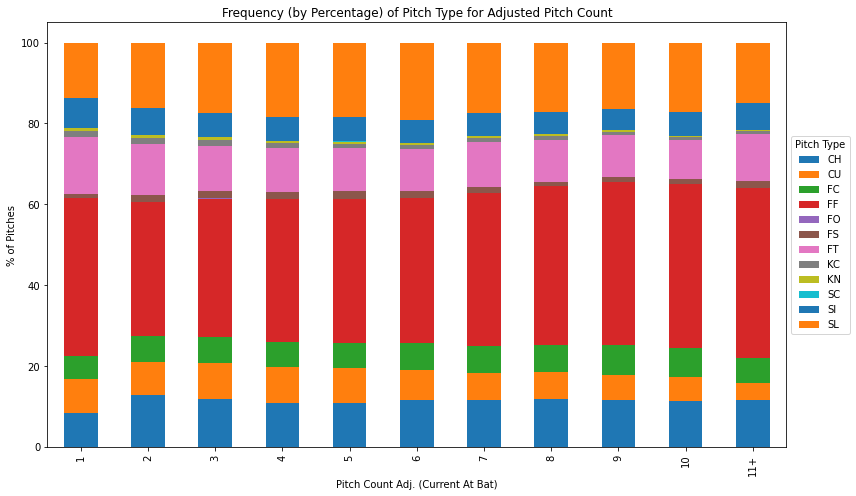

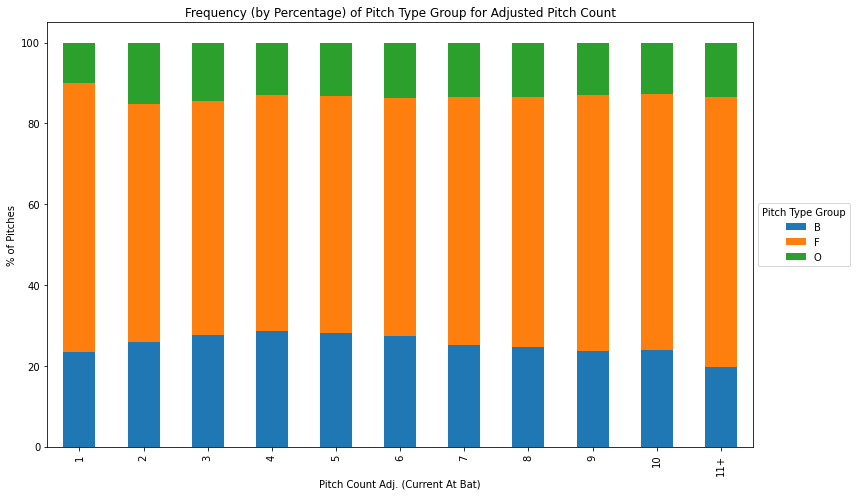

In [71]:
# INDIVIDUAL PITCH TYPES
grouped = data.groupby(['pcount_at_bat_adj', 'pitch_type']).size().reset_index(name='counts')
total_pitches = grouped.groupby('pcount_at_bat_adj')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='pcount_at_bat_adj', columns='pitch_type', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type for Adjusted Pitch Count')
plt.ylabel('% of Pitches')
plt.xlabel('Pitch Count Adj. (Current At Bat)')
plt.legend(title='Pitch Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# PITCH TYPE GROUPS
grouped = data.groupby(['pcount_at_bat_adj', 'pitch_type_group']).size().reset_index(name='counts')
total_pitches = grouped.groupby('pcount_at_bat_adj')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='pcount_at_bat_adj', columns='pitch_type_group', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type Group for Adjusted Pitch Count')
plt.ylabel('% of Pitches')
plt.xlabel('Pitch Count Adj. (Current At Bat)')
plt.legend(title='Pitch Type Group', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### Findings: No clear relationship

# 17. Examine distribution of pitch types for different teams

## a. Plot distribution of pitch types for different teams (stacked)

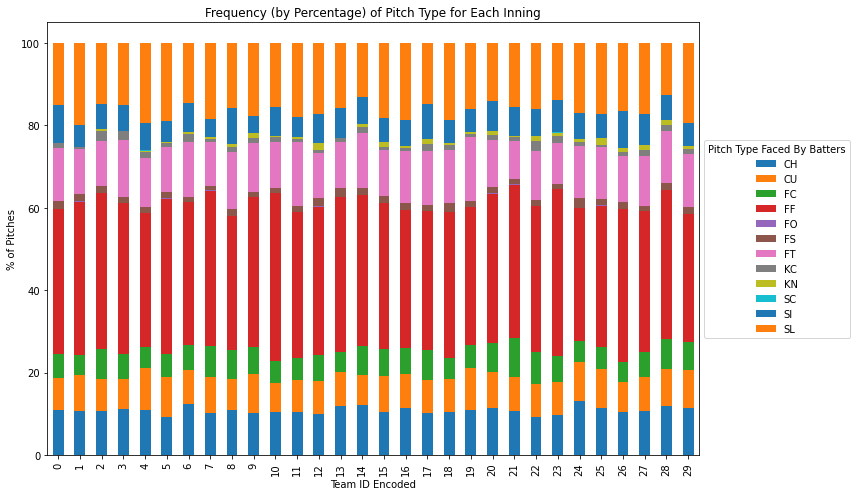

In [72]:
le_stand = LabelEncoder()
data['team_id_b_encoded'] = le_stand.fit_transform(data['team_id_b'])

grouped = data.groupby(['team_id_b_encoded', 'pitch_type']).size().reset_index(name='counts')
total_pitches = grouped.groupby('team_id_b_encoded')['counts'].transform('sum')
grouped['percentage'] = (grouped['counts'] / total_pitches) * 100

pivot_data = grouped.pivot(index='team_id_b_encoded', columns='pitch_type', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Frequency (by Percentage) of Pitch Type for Each Inning')
plt.ylabel('% of Pitches')
plt.xlabel('Team ID Encoded')
plt.legend(title='Pitch Type Faced By Batters', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# 18. Analyze which pitching sequences are most common

## a. n=2

In [73]:
# Step 1: Filter out only the columns of interest and sort the data
sorted_data = data[['game_pk', 'team_id_p', 'top', 'at_bat_num', 'pcount_at_bat', 'pitch_type']].sort_values(
    by=['game_pk', 'team_id_p', 'top', 'at_bat_num', 'pcount_at_bat'])

# Step 2: Extract sequences
def get_sequences(group):
    """Generate sequences of length n from a group"""
    seq_length = [2]
    sequences = []
    for n in seq_length:
        if len(group) >= n:
            for i in range(len(group) - n + 1):
                sequences.append(tuple(group.iloc[i:i+n]))
    return sequences

# Group the data by game, team, top/bottom of inning, at_bat_num and apply the function
sequences = sorted_data.groupby(['game_pk', 'team_id_p', 'top', 'at_bat_num'])['pitch_type'].apply(get_sequences)

# Step 3: Count sequences
all_sequences = pd.Series([seq for sublist in sequences.dropna() for seq in sublist])

top_sequences = all_sequences.value_counts()

top_sequences.head(10)

(FF, FF)    86087
(FF, SL)    29734
(SL, SL)    28545
(SL, FF)    25982
(FT, FT)    22197
(FF, CH)    17560
(CH, FF)    15614
(SI, SI)    14817
(CH, CH)    13529
(FF, CU)    13521
dtype: int64

## b. n=3

In [74]:
# Step 1: Filter out only the columns of interest and sort the data
sorted_data = data[['game_pk', 'team_id_p', 'top', 'at_bat_num', 'pcount_at_bat', 'pitch_type']].sort_values(
    by=['game_pk', 'team_id_p', 'top', 'at_bat_num', 'pcount_at_bat'])

# Step 2: Extract sequences
def get_sequences(group):
    """Generate sequences of length n from a group"""
    seq_length = [3]
    sequences = []
    for n in seq_length:
        if len(group) >= n:
            for i in range(len(group) - n + 1):
                sequences.append(tuple(group.iloc[i:i+n]))
    return sequences

# Group the data by game, team, top/bottom of inning, at_bat_num and apply the function
sequences = sorted_data.groupby(['game_pk', 'team_id_p', 'top', 'at_bat_num'])['pitch_type'].apply(get_sequences)

# Step 3: Count sequences
all_sequences = pd.Series([seq for sublist in sequences.dropna() for seq in sublist])

top_sequences = all_sequences.value_counts()

top_sequences.head(10)

(FF, FF, FF)    33354
(FF, FF, SL)    10115
(FF, SL, FF)     8995
(SL, FF, FF)     7944
(FF, SL, SL)     7104
(SL, SL, SL)     7067
(FT, FT, FT)     6765
(SL, SL, FF)     6267
(SL, FF, SL)     5796
(SI, SI, SI)     5293
dtype: int64

## c. n=4

In [75]:
# Step 1: Filter out only the columns of interest and sort the data
sorted_data = data[['game_pk', 'team_id_p', 'top', 'at_bat_num', 'pcount_at_bat', 'pitch_type']].sort_values(
    by=['game_pk', 'team_id_p', 'top', 'at_bat_num', 'pcount_at_bat'])

# Step 2: Extract sequences
def get_sequences(group):
    """Generate sequences of length n from a group"""
    seq_length = [4]
    sequences = []
    for n in seq_length:
        if len(group) >= n:
            for i in range(len(group) - n + 1):
                sequences.append(tuple(group.iloc[i:i+n]))
    return sequences

# Group the data by game, team, top/bottom of inning, at_bat_num and apply the function
sequences = sorted_data.groupby(['game_pk', 'team_id_p', 'top', 'at_bat_num'])['pitch_type'].apply(get_sequences)

# Step 3: Count sequences
all_sequences = pd.Series([seq for sublist in sequences.dropna() for seq in sublist])

top_sequences = all_sequences.value_counts()

top_sequences.head(10)

(FF, FF, FF, FF)    13232
(FF, FF, FF, SL)     3321
(FF, FF, SL, FF)     3200
(FF, SL, FF, FF)     2945
(SL, FF, FF, FF)     2463
(FT, FT, FT, FT)     2273
(FF, FF, SL, SL)     2156
(FF, SL, SL, FF)     2001
(SI, SI, SI, SI)     1906
(SL, SL, SL, SL)     1842
dtype: int64

In [76]:
for column in data.columns:
    print(column, data[column].dtype)

uid int64
game_pk int64
year int64
date datetime64[ns]
team_id_b int64
team_id_p int64
inning int64
top int64
at_bat_num int64
pcount_at_bat int64
pcount_pitcher int64
balls int64
strikes int64
fouls int64
outs int64
is_final_pitch int64
final_balls int64
final_strikes int64
final_outs int64
start_tfs int64
start_tfs_zulu object
batter_id int64
stand object
b_height object
pitcher_id int64
p_throws object
at_bat_des object
event object
event2 object
event3 object
event4 object
away_team_runs int64
home_team_runs int64
score object
pitch_des object
pitch_id int64
type object
pitch_tfs float64
pitch_tfs_zulu object
x float64
y float64
sv_id object
start_speed float64
end_speed float64
sz_top float64
sz_bot float64
pfx_x float64
pfx_z float64
px float64
pz float64
x0 float64
z0 float64
y0 float64
vx0 float64
vz0 float64
vy0 float64
ax float64
az float64
ay float64
break_length float64
break_y float64
break_angle float64
pitch_type object
type_confidence float64
zone float64
nasty float64


# 19. BUILDING THE MODEL

#### Decided to split chronologically + grouped by game

## a. Encode non-numeric variables

In [77]:
# Initialize the encoders
le_pitch_type = LabelEncoder()
le_batter_pitcher_hand = LabelEncoder()
le_pitch_count = LabelEncoder()
le_previous_pitch_1 = LabelEncoder()
le_previous_pitch_group_1 = LabelEncoder()
le_previous_pitch_2 = LabelEncoder()
le_previous_pitch_group_2 = LabelEncoder()
le_last_two_pitch_groups = LabelEncoder()

# Fit and transform the columns
data['pitch_type_encoded'] = le_pitch_type.fit_transform(data['pitch_type'])
data['batter_pitcher_hand_encoded'] = le_batter_pitcher_hand.fit_transform(data['batter_pitcher_hand'])
data['pitch_count_encoded'] = le_pitch_count.fit_transform(data['pitch_count'])
data['previous_pitch_1_encoded'] = le_previous_pitch_1.fit_transform(data['previous_pitch_1'])
data['previous_pitch_group_1_encoded'] = le_previous_pitch_group_1.fit_transform(data['previous_pitch_group_1'])
data['previous_pitch_2_encoded'] = le_previous_pitch_2.fit_transform(data['previous_pitch_2'])
data['previous_pitch_group_2_encoded'] = le_previous_pitch_group_2.fit_transform(data['previous_pitch_group_2'])
data['last_two_pitch_groups_encoded'] = le_last_two_pitch_groups.fit_transform(data['last_two_pitch_groups'])

In [78]:
# Sort by date and game_pk (unique game id)
data_sorted = data.sort_values(by=['date', 'game_pk'])

# Find the index to split at (80% of the games)
unique_games = data_sorted['game_pk'].unique()
split_idx = int(len(unique_games) * 0.8)

# Find the last game in the training set
last_train_game = unique_games[split_idx - 1]

# Split the data so that all rows with the same game_pk remain in the same set
train_data = data_sorted[data_sorted['game_pk'] <= last_train_game]
test_data = data_sorted[data_sorted['game_pk'] > last_train_game]

print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")
print(f"Test size: {round(test_data.shape[0]/data.shape[0] * 100, 2)}%")

Training set shape: (533918, 191)
Test set shape: (131502, 191)
Test size: 19.76%


In [79]:
features = [
    'pitch_count_encoded', 
    'batter_pitcher_hand_encoded', 
    'was_previous_in_zone', 
    'was_previous_chased', 
    'was_previous_contacted', 
    'inside_swing_rate', 
    'outside_swing_rate', 
    'contact_rate', 
    'is_on_base', 
    'is_starter', 
    'batting_position', 
    'is_pitcher',
    'team_id_b_encoded',
    'pitcher_rate_CH', 
    'pitcher_rate_CU', 
    'pitcher_rate_FC', 
    'pitcher_rate_FF', 
    'pitcher_rate_FT', 
    'pitcher_rate_KC', 
    'pitcher_rate_KN', 
    'pitcher_rate_SI', 
    'pitcher_rate_SL', 
    'pitcher_rate_FS', 
    'pitcher_rate_FO', 
    'pitcher_rate_SC', 
    'batter_rate_CH', 
    'batter_rate_CU', 
    'batter_rate_FC', 
    'batter_rate_FF', 
    'batter_rate_FT', 
    'batter_rate_KC', 
    'batter_rate_KN', 
    'batter_rate_SI', 
    'batter_rate_SL', 
    'batter_rate_FS', 
    'batter_rate_FO', 
    'batter_rate_SC', 
    'total_pitches_received', 
    'previous_pitch_1_encoded', 
    'previous_pitch_2_encoded'
]

features2 = [
    'pitch_count_encoded', 
    'batter_pitcher_hand_encoded', 
    'inside_swing_rate', 
    'outside_swing_rate', 
    'is_on_base',
    'previous_pitch_1_encoded', 
    'previous_pitch_2_encoded'
    'batting_position'
]

## b. Baseline models

### i. Predicting only fastballs (benchmark)

In [80]:
X_train = train_data[features]
y_train = train_data['pitch_type']

X_test = test_data[features]
y_test = test_data['pitch_type']

In [81]:
# Create a prediction array where all predictions are 'FF'
y_pred_all_fastballs = ['FF'] * len(y_test)

# Calculate accuracy
accuracy = accuracy_score(test_data['pitch_type'], y_pred_all_fastballs)

print(f"Accuracy of naive FF model: {accuracy * 100:.2f}%")

Accuracy of naive FF model: 36.32%


### ii. Logistic Regression (Lasso Regularization) 

In [82]:
X_train_na = train_data[features].fillna(0)
y_train_na = train_data['pitch_type'].fillna(0)

X_test_na = test_data[features].fillna(0)
y_test_na = test_data['pitch_type'].fillna(0)

In [83]:
# Initialize logistic regression model
# log_reg = LogisticRegression(multi_class='multinomial', class_weight='balanced', solver='lbfgs', max_iter=150, n_jobs=-1)  # using all cores
log_reg = LogisticRegression(C=0.1, penalty='l1', solver='saga', multi_class='multinomial', max_iter=150, n_jobs=-1)

# Fit the model
log_reg.fit(X_train_na, y_train_na)

# Predict on the test set
y_pred = log_reg.predict(X_test_na)

# Evaluate the model
train_score = log_reg.score(X_train_na, y_train_na)
test_score = log_reg.score(X_test_na, y_test_na)

print("Training set score: {:.2f}".format(train_score))
print("Test set score: {:.2f}".format(test_score))

# Print counts of predictions
prediction_counts = Counter(y_pred)
print("Prediction counts:", prediction_counts)

/Users/michaelshahidi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training set score: 0.36
Test set score: 0.37
Prediction counts: Counter({'FF': 129078, 'SL': 2359, 'SI': 30, 'CH': 21, 'FT': 7, 'CU': 6, 'FC': 1})


### iii. Random Forest Classification

In [84]:
# Initialize the random forest classifier
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=20, n_jobs=-1)

# Fit the model
rf_clf.fit(X_train_na, y_train_na)

# Predict on the test set
y_pred = rf_clf.predict(X_test_na)

# Evaluate the model
train_score = rf_clf.score(X_train_na, y_train_na)
test_score = rf_clf.score(X_test_na, y_test_na)

print("Training set score: {:.2f}".format(train_score))
print("Test set score: {:.2f}".format(test_score))

# Print counts of predictions
prediction_counts = Counter(y_pred)
print("Prediction counts:", prediction_counts)

Training set score: 0.94
Test set score: 0.70
Prediction counts: Counter({'FF': 59728, 'SL': 23891, 'CH': 11599, 'FT': 11130, 'SI': 8703, 'CU': 7465, 'FC': 5716, 'FS': 1451, 'KC': 1097, 'KN': 670, 'SC': 31, 'FO': 21})


### iv. Gradient Boosted Trees (XGBoost)

In [85]:
X_train = train_data[features]
y_train_encoded = train_data['pitch_type_encoded']

X_test = test_data[features]
y_test_encoded = test_data['pitch_type_encoded']

In [146]:
# Convert the dataset into DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test)

# Set the parameters for multiclass classification
param = {
    'objective': 'multi:softmax', # softmax for multiclass classification
    'num_class': len(set(y_train_encoded)),  # number of classes
    'max_depth': 15,
    'n_estimators': 10,
    'nthread': -1,
}

# Train the model
bst = xgb.train(param, dtrain, param['n_estimators'])

# Predict on the test set
y_pred = bst.predict(dtest)

# Evaluate the model
train_score = accuracy_score(y_train_encoded, bst.predict(dtrain))
test_score = accuracy_score(y_test_encoded, y_pred)

print("Training set score: {:.2f}".format(train_score))
print("Test set score: {:.2f}".format(test_score))

# Print counts of predictions
prediction_counts = Counter(y_pred)
print("Prediction counts:", le_pitch_type.inverse_transform(prediction_counts))

[12:27:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10670 extra nodes, 0 pruned nodes, max_depth=15
[12:27:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7442 extra nodes, 0 pruned nodes, max_depth=15
[12:27:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6624 extra nodes, 0 pruned nodes, max_depth=15
[12:27:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7388 extra nodes, 0 pruned nodes, max_depth=15
[12:27:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[12:27:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1500 extra nodes, 0 pruned nodes, max_depth=15
[12:27:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 9622 extra nodes, 0 pruned nodes, max_depth=15
[12:27:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1156 extra nodes, 0 pruned nodes, max_depth=15
[12:27:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes

[12:30:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7644 extra nodes, 0 pruned nodes, max_depth=15
[12:30:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7362 extra nodes, 0 pruned nodes, max_depth=15
[12:30:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4820 extra nodes, 0 pruned nodes, max_depth=15
[12:30:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7480 extra nodes, 0 pruned nodes, max_depth=15
[12:31:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=11
[12:31:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1662 extra nodes, 0 pruned nodes, max_depth=15
[12:31:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5728 extra nodes, 0 pruned nodes, max_depth=15
[12:31:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1242 extra nodes, 0 pruned nodes, max_depth=15
[12:31:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra node

ValueError: y should be a 1d array, got an array of shape () instead.

In [144]:
# Change objective to 'multi:softprob'
param['objective'] = 'multi:softprob'

# Train the model
bst = xgb.train(param, dtrain, param['n_estimators'])

# Get class probabilities on the test set
y_probs = bst.predict(dtest)

[12:20:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10670 extra nodes, 0 pruned nodes, max_depth=15
[12:21:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7442 extra nodes, 0 pruned nodes, max_depth=15
[12:21:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6624 extra nodes, 0 pruned nodes, max_depth=15
[12:21:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7388 extra nodes, 0 pruned nodes, max_depth=15
[12:21:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[12:21:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1500 extra nodes, 0 pruned nodes, max_depth=15
[12:21:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 9622 extra nodes, 0 pruned nodes, max_depth=15
[12:21:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1156 extra nodes, 0 pruned nodes, max_depth=15
[12:21:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes

[12:24:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7644 extra nodes, 0 pruned nodes, max_depth=15
[12:24:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7362 extra nodes, 0 pruned nodes, max_depth=15
[12:24:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4820 extra nodes, 0 pruned nodes, max_depth=15
[12:24:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7480 extra nodes, 0 pruned nodes, max_depth=15
[12:24:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=11
[12:24:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1662 extra nodes, 0 pruned nodes, max_depth=15
[12:24:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5728 extra nodes, 0 pruned nodes, max_depth=15
[12:24:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1242 extra nodes, 0 pruned nodes, max_depth=15
[12:24:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra node

## Plot calibration curves for different baseline models

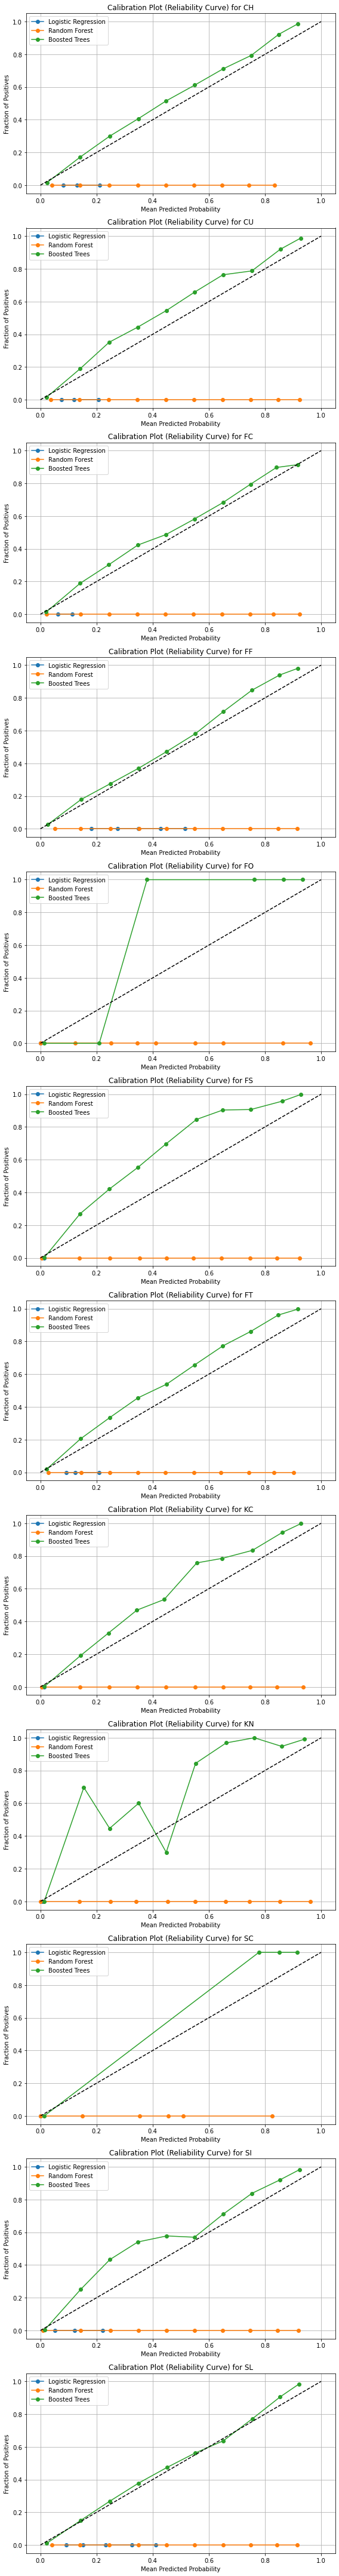

In [145]:
# Predicted probabilities from each model
y_probs_log_reg = log_reg.predict_proba(X_test_na)
y_probs_rf = rf_clf.predict_proba(X_test_na)
# y_probs_svm = svm_clf.predict_proba(X_test)
y_probs_bst = bst.predict(dtest)

# Setup figure for plots
n_classes = y_probs_log_reg.shape[1]
fig, axes = plt.subplots(nrows=n_classes, ncols=1, figsize=(8, 5*n_classes))

for idx in range(n_classes):
    # Actual vs. Predicted probabilities for each model
    prob_true_log_reg, prob_pred_log_reg = calibration_curve(y_test_na == idx, y_probs_log_reg[:, idx], n_bins=10)
    prob_true_rf, prob_pred_rf = calibration_curve(y_test_na == idx, y_probs_rf[:, idx], n_bins=10)
#     prob_true_svm, prob_pred_svm = calibration_curve(y_test == idx, y_probs_svm[:, idx], n_bins=10)
    prob_true_bst, prob_pred_bst = calibration_curve(y_test_encoded == idx, y_probs_bst[:, idx], n_bins=10)
    
    # Decode the pitch type class
    decoded_class = le_pitch_type.inverse_transform([idx])[0]
    
    ax = axes[idx]
    ax.plot(prob_pred_log_reg, prob_true_log_reg, "-o", label="Logistic Regression")
    ax.plot(prob_pred_rf, prob_true_rf, "-o", label="Random Forest")
#     ax.plot(prob_pred_svm, prob_true_svm, "-o", label="SVM")
    ax.plot(prob_pred_bst, prob_true_bst, "-o", label="Boosted Trees")
    
    ax.plot([0, 1], [0, 1], "--", color="black")
    ax.set_xlabel("Mean Predicted Probability")
    ax.set_ylabel("Fraction of Positives")
    ax.set_title(f"Calibration Plot (Reliability Curve) for {decoded_class}")
    ax.legend(loc="best")
    ax.grid(True)

plt.tight_layout()
plt.show()

#### Get decoded values

In [93]:
previous_pitch_1_decoded = le_previous_pitch_1.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print(previous_pitch_1_decoded)

pitch_count_decoded = le_pitch_count.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
print(pitch_count_decoded)

batter_pitcher_hand_decoded = le_batter_pitcher_hand.inverse_transform([0, 1, 2, 3])
print(batter_pitcher_hand_decoded)

['CH' 'CU' 'FC' 'FF' 'FO' 'FS' 'FT' 'KC' 'KN' 'SC' 'SI' 'SL' nan]
['0-0' '0-1' '0-2' '1-0' '1-1' '1-2' '2-0' '2-1' '2-2' '3-0' '3-1' '3-2']
['LL' 'LR' 'RL' 'RR']


# 20. Select the Best Model and Tune Hyperparameters

## Since Gradient Boosted Trees (using XGBoost) performed best (using both accuracy and calibration curve as indicators), I will select that model to tune. Another benefit to gradient boosted trees is that they are less affected by multi-collinearity.

In [94]:
param_distributions = {
    'max_depth': randint(8, 16),
    'min_child_weight': randint(1, 11),
    'gamma': uniform(0.0, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_lambda': [1, 5, 10],
    'reg_alpha': uniform(0, 0.5),
    'learning_rate': uniform(0.05, 0.25)
}

xgb_classifier = xgb.XGBClassifier(objective='multi:softprob', n_estimators=10, n_jobs=-1)
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_distributions, n_iter=10, cv=3, scoring='neg_log_loss', n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Obtain the best model
best_xgb = random_search.best_estimator_

# Predict on training and test set using the best model
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Compute accuracy scores
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Best parameters found: ", random_search.best_params_)
print("Training set score: {:.2f}".format(train_score))
print("Test set score: {:.2f}".format(test_score))

# Print counts of test predictions
prediction_counts = Counter(y_test_pred)
print("Prediction counts:", prediction_counts)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'colsample_bytree': 0.9208787923016158, 'gamma': 0.022365193103931248, 'learning_rate': 0.2967217341501293, 'max_depth': 15, 'min_child_weight': 1, 'reg_alpha': 0.0993578407670862, 'reg_lambda': 10, 'subsample': 0.9261845713819337}
Training set score: 0.91
Test set score: 0.74
Prediction counts: Counter({'FF': 54562, 'SL': 24160, 'FT': 12614, 'CH': 12286, 'CU': 8663, 'SI': 8607, 'FC': 6733, 'FS': 1647, 'KC': 1365, 'KN': 803, 'SC': 32, 'FO': 30})


## Using best params (given by randomized search):

In [143]:
booster = best_xgb.get_booster()

In [141]:
# Get feature importance
feature_importances = booster.get_score(importance_type='cover')
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Get top features list
top_features = [features + ": " + str(importance) for features, importance in sorted_features]

# Split features and their importance scores
feature_names = [item.split(": ")[0] for item in top_features]
feature_scores = [float(item.split(": ")[1]) for item in top_features]

# Create a DataFrame
df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance Score': feature_scores
})

# Display the DataFrame
df_feature_importance

,Feature,Importance Score
0,pitcher_rate_KN,5622.178518
1,pitcher_rate_FO,4908.631485
2,pitcher_rate_SI,886.462609
3,pitcher_rate_FS,775.581973
4,pitcher_rate_SC,768.117012
5,pitcher_rate_KC,746.065624
6,contact_rate,628.808953
7,previous_pitch_1_encoded,599.906483
8,pitch_count_encoded,559.689142
9,pitcher_rate_SL,558.041718


### Findings: 
#### When using 'cover' to measure feature importance,:
- The model heavily relies on the pitcher's tendencies (i.e., historical pitch distribution).
- The recent actions in the game, the batter's general behavior, and specific reactions to pitch types also have a considerable influence.
- Some game state features and specific behaviors of the batter (like if the last pitch was chased or was in the zone) hold lesser importance.

In [132]:
# Get feature importance
feature_importances = booster.get_score(importance_type='gain')
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Get top features list
top_features = [features + ": " + str(importance) for features, importance in sorted_features]

# Split features and their importance scores
feature_names = [item.split(": ")[0] for item in top_features]
feature_scores = [float(item.split(": ")[1]) for item in top_features]

# Create a DataFrame
df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance Score': feature_scores
})

# Display the DataFrame
df_feature_importance

,Feature,Importance Score
0,pitcher_rate_KN,285.622158
1,pitcher_rate_SI,78.357499
2,contact_rate,34.190751
3,pitcher_rate_FC,31.612814
4,pitcher_rate_FT,30.352336
5,pitcher_rate_FS,27.033849
6,pitcher_rate_SL,24.829470
7,pitcher_rate_KC,23.542006
8,pitcher_rate_FF,19.273959
9,batter_pitcher_hand_encoded,18.629363


### Findings: 
#### When using 'gain' to measure feature importance,:
- Pitcher-specific features, especially their rate of throwing certain types of pitches, seem to be very influential in improving prediction accuracy.
- The batter's general behavior and characteristics also play a role, but with varying degrees of influence. The historical distribution of pitches batters face plays smaller importance, likely due to the fact that pitchers are largely restricted to the set of pitches in their repertoire.
- Some game state features and specific behaviors have a lesser impact on the model's decision-making, in terms of improving accuracy.


Training Accuracy: 91.12%
Test Accuracy: 74.35%
Kolmogorov-Smirnov test: D = 0.16666666666666666, p-value = 0.9984852944874484
95% Confidence Interval for Accuracy: [0.7407151602256999, 0.7456291539292178]


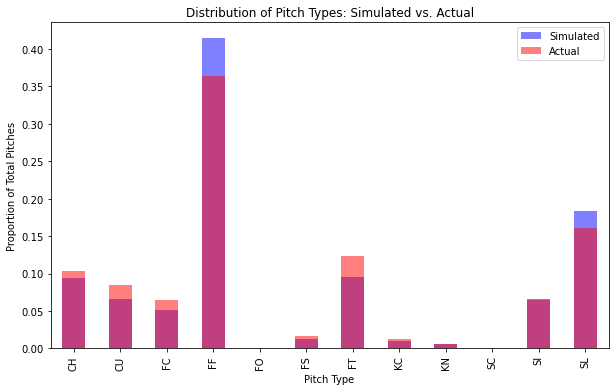

In [140]:
# Point estimate comparison
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_score * 100:.2f}%")
print(f"Test Accuracy: {test_score * 100:.2f}%")

# Distributional comparison
simulated_distribution = pd.Series(y_test_pred).value_counts(normalize=True)
actual_distribution = pd.Series(y_test).value_counts(normalize=True)
D, p_value = ks_2samp(simulated_distribution, actual_distribution)
print(f"Kolmogorov-Smirnov test: D = {D}, p-value = {p_value}")

# Confidence intervals
alpha = 0.05
bootstrapped_means = []
indices = np.arange(len(X_test))
for _ in range(100):
    sample_indices = np.random.choice(indices, len(indices), replace=True)
    sample_X = X_test.iloc[sample_indices]
    sample_y = y_test.iloc[sample_indices]
    sample_pred = best_xgb.predict(sample_X)
    bootstrapped_means.append(accuracy_score(sample_y, sample_pred))
conf_interval = [np.percentile(bootstrapped_means, 2.5), np.percentile(bootstrapped_means, 97.5)]
print(f"95% Confidence Interval for Accuracy: {conf_interval}")

# Visualization
plt.figure(figsize=(10, 6))
simulated_distribution.sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Simulated')
actual_distribution.sort_index().plot(kind='bar', alpha=0.5, color='red', label='Actual')
plt.ylabel('Proportion of Total Pitches')
plt.xlabel('Pitch Type')
plt.legend()
plt.title("Distribution of Pitch Types: Simulated vs. Actual")
plt.show()

In [139]:
pitch_order = ['CH', 'CU', 'FC', 'FF', 'FO', 'FS', 'FT', 'KC', 'KN', 'SC', 'SI', 'SL']

# Calculate differences between simulated and actual for each pitch type
difference_df = pd.DataFrame({
    'Pitch_Type': simulated_distribution.index,
    'Difference': simulated_distribution.values - actual_distribution.reindex(simulated_distribution.index).values,
})
# Reorder the rows based on the given pitch order
difference_df = difference_df.set_index('Pitch_Type').reindex(pitch_order).reset_index()

difference_df

,Pitch_Type,Difference
0,CH,-0.009985
1,CU,-0.019057
2,FC,-0.013011
3,FF,0.051680
4,FO,-0.000030
5,FS,-0.003445
6,FT,-0.026950
7,KC,-0.002084
8,KN,0.000228
9,SC,-0.000015


### Findings: The model overpredicts the amount of Four-seam Fastballs and Sliders (and Sinkers by a small proportion), whereas Changeups, Curveballs, Cutters, Split-fingered Fastballs, Knuckle-curves, and Two-seam Fastballs are slightly underpredicted. 

### Log loss can sometimes pose issues when attempting to predict class probabilities for imbalanced datasets– it generally tends to favor the more common classes, which is what we notice to be the case here.

## a. Feed model some new observations and show associated class probabilities

### Scenario #1
- #### Count:
    - The current pitch count is 0-2. This means the batter has no balls and two strikes against them, putting the pitcher in an advantageous position.

- #### Previous Pitches:
    - The most recent pitch (previous_pitch_1) was a Slider.
    - The pitch before the slider (previous_pitch_2) was a Curveball.

- #### Pitch Location and Batter Reaction:
    - The previous pitch was inside the strike zone.
    - The batter did not chase the previous pitch.
    - The batter made contact with the previous pitch.

- #### Batter's Performance Metrics:
    - The batter has an inside swing rate of 65%.
    - The batter has an outside swing rate of 25%.
    - The batter's overall contact rate is 78%.

- #### Game Situation:
    - There is a runner on base.
    - The current batter is not the pitcher.
    - The current batter is in the 3rd batting position.
    - The batter belongs to the team encoded as 5.
    - The batter has received 1600 pitches in total so far in this dataset.
    - The batter is right-handed, and the pitcher is right-handed.

- #### Pitcher Information:
    - The pitcher is currently in the starting position.
    - The pitcher's pitch type tendencies are:
        - Changeup (CH): 10%
        - Curveball (CU): 5%
        - Cutter (FC): 2%
        - Four-seam Fastball (FF): 40%
        - Two-seam Fastball (FT): 10%
        - Knuckle-curve (KC): 5%
        - Knuckleball (KN): 0%
        - Sinker (SI): 15%
        - Slider (SL): 10%
        - Split-fingered Fastball (FS): 2%
        - Forkball (FO): 0%
        - Screwball (SC): 0%

- #### Batter Historical Pitch Distribution:
    - Changeup (CH): 10%
    - Curveball (CU): 5%
    - Cutter (FC): 2%
    - Four-seam Fastball (FF): 35%
    - Two-seam Fastball (FT): 10%
    - Knuckle-curve (KC): 5%
    - Knuckleball (KN): 0%
    - Sinker (SI): 20%
    - Slider (SL): 10%
    - Split-fingered Fastball (FS): 2%
    - Forkball (FO): 0%
    - Screwball (SC): 0%

In [96]:
sample_pitch_1 = {
    'pitch_count_encoded': [2], 
    'batter_pitcher_hand_encoded': [3], 
    'was_previous_in_zone': [True], 
    'was_previous_chased': [False], 
    'was_previous_contacted': [True], 
    'inside_swing_rate': [0.65], 
    'outside_swing_rate': [0.45], 
    'contact_rate': [0.78], 
    'is_on_base': [True], 
    'is_starter': [True], 
    'batting_position': [3], 
    'is_pitcher': [False],
    'team_id_b_encoded': [5],
    'pitcher_rate_CH': [0.1], 
    'pitcher_rate_CU': [0.05], 
    'pitcher_rate_FC': [0.02], 
    'pitcher_rate_FF': [0.3], 
    'pitcher_rate_FT': [0.1], 
    'pitcher_rate_KC': [0.05], 
    'pitcher_rate_KN': [0.0], 
    'pitcher_rate_SI': [0.15], 
    'pitcher_rate_SL': [0.3], 
    'pitcher_rate_FS': [0.02], 
    'pitcher_rate_FO': [0.0], 
    'pitcher_rate_SC': [0.0], 
    'batter_rate_CH': [0.1], 
    'batter_rate_CU': [0.05], 
    'batter_rate_FC': [0.02], 
    'batter_rate_FF': [0.35], 
    'batter_rate_FT': [0.1], 
    'batter_rate_KC': [0.05], 
    'batter_rate_KN': [0.0], 
    'batter_rate_SI': [0.2], 
    'batter_rate_SL': [0.1], 
    'batter_rate_FS': [0.02], 
    'batter_rate_FO': [0.0], 
    'batter_rate_SC': [0.0], 
    'total_pitches_received': [1600], 
    'previous_pitch_1_encoded': [11], 
    'previous_pitch_2_encoded': [1]
}
# Create a dataframe from the sample observation
sample_1_df = pd.DataFrame(sample_pitch_1)

# Predict the class probabilities for the sample observation
class_probabilities = best_xgb.predict_proba(sample_1_df)[0]

# Get the class labels from the trained model
class_labels = best_xgb.classes_

# Create a dictionary that maps each class label to its respective probability
probabilities_dict = dict(zip(class_labels, class_probabilities))

# Sort the dictionary by values (probabilities) in descending order
sorted_probabilities = sorted(probabilities_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted probabilities
for label, prob in sorted_probabilities:
    print(f"{label}: {prob:.4f}")

SL: 0.4056
CH: 0.1749
SI: 0.1027
FS: 0.0541
FC: 0.0519
FT: 0.0445
KC: 0.0414
CU: 0.0391
FF: 0.0317
FO: 0.0180
SC: 0.0180
KN: 0.0180


### Scenario 2:
- #### Count:
    - The current pitch count is 1-1. This is a neutral situation where the batter and pitcher are in a fairly balanced position.

- #### Previous Pitches:
    - The most recent pitch (previous_pitch_1) was a Four-seam Fastball.
    - The pitch before that (previous_pitch_2) was a Sinker.

- #### Pitch Location and Batter Reaction:
    - The previous pitch was outside the strike zone.
    - The batter chased the previous pitch.
    - The batter made contact with the previous pitch.

- #### Batter's Performance Metrics:
    - The batter has an inside swing rate of 65%.
    - The batter has an outside swing rate of 30%.
    - The batter's overall contact rate is 65%.
- #### Game Situation:
    - There is no runner on base.
    - The current batter is a pitcher.
    - The batter is in the 8th batting position.
    - The batter belongs to the team encoded as 14.
    - The batter has received 105 pitches in total so far in this dataset.
    - The batter is left-handed, and the pitcher is right-handed.

- #### Pitcher Information:
    - The pitcher is currently in the starting position.
    - The pitcher's pitch type tendencies are:
        - Changeup (CH): 14%
        - Curveball (CU): 5%
        - Cutter (FC): 0%
        - Four-seam Fastball (FF): 35%
        - Two-seam Fastball (FT): 10%
        - Knuckle-curve (KC): 5%
        - Knuckleball (KN): 0%
        - Sinker (SI): 5%
        - Slider (SL): 25%
        - Split-fingered Fastball (FS): 0%
        - Forkball (FO): 0%
        - Screwball (SC): 0%
- #### Batter Historical Pitch Distribution:
    - Changeup (CH): 10%
    - Curveball (CU): 5%
    - Cutter (FC): 2%
    - Four-seam Fastball (FF): 35%
    - Two-seam Fastball (FT): 10%
    - Knuckle-curve (KC): 0%
    - Knuckleball (KN): 0%
    - Sinker (SI): 20%
    - Slider (SL): 15%
    - Split-fingered Fastball (FS): 2%
    - Forkball (FO): 0%
    - Screwball (SC): 0%

In [99]:
sample_pitch_2 = {
    'pitch_count_encoded': [4], 
    'batter_pitcher_hand_encoded': [1], 
    'was_previous_in_zone': [False], 
    'was_previous_chased': [True], 
    'was_previous_contacted': [True], 
    'inside_swing_rate': [0.65], 
    'outside_swing_rate': [0.30], 
    'contact_rate': [0.65], 
    'is_on_base': [False], 
    'is_starter': [True], 
    'batting_position': [8], 
    'is_pitcher': [True],
    'team_id_b_encoded': [14],
    'pitcher_rate_CH': [0.14], 
    'pitcher_rate_CU': [0.05], 
    'pitcher_rate_FC': [0.0], 
    'pitcher_rate_FF': [0.35], 
    'pitcher_rate_FT': [0.1], 
    'pitcher_rate_KC': [0.05], 
    'pitcher_rate_KN': [0.0], 
    'pitcher_rate_SI': [0.05], 
    'pitcher_rate_SL': [0.25], 
    'pitcher_rate_FS': [0.0], 
    'pitcher_rate_FO': [0.0], 
    'pitcher_rate_SC': [0.0], 
    'batter_rate_CH': [0.1], 
    'batter_rate_CU': [0.05], 
    'batter_rate_FC': [0.02], 
    'batter_rate_FF': [0.35], 
    'batter_rate_FT': [0.1], 
    'batter_rate_KC': [0.00], 
    'batter_rate_KN': [0.0], 
    'batter_rate_SI': [0.2], 
    'batter_rate_SL': [0.15], 
    'batter_rate_FS': [0.02], 
    'batter_rate_FO': [0.0], 
    'batter_rate_SC': [0.0], 
    'total_pitches_received': [105],
    'previous_pitch_1_encoded': [3],
    'previous_pitch_2_encoded': [10]
}
# Create a dataframe from the sample observation
sample_2_df = pd.DataFrame(sample_pitch_2)

# Predict the class probabilities for the sample observation
class_probabilities = best_xgb.predict_proba(sample_2_df)[0]

# Get the class labels from the trained model
class_labels = best_xgb.classes_

# Create a dictionary that maps each class label to its respective probability
probabilities_dict = dict(zip(class_labels, class_probabilities))

# Sort the dictionary by values (probabilities) in descending order
sorted_probabilities = sorted(probabilities_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted probabilities
for label, prob in sorted_probabilities:
    print(f"{label}: {prob:.4f}")

FF: 0.7478
CH: 0.0987
SL: 0.0558
CU: 0.0169
FT: 0.0142
SI: 0.0139
KC: 0.0099
FC: 0.0089
FS: 0.0085
FO: 0.0085
SC: 0.0084
KN: 0.0084


# 21. Next Steps

### 1. Creating a Stacked Model:
- **Rationale:** Stacking involves combining predictions from multiple models, which can lead to improved accuracy by leveraging the strengths of each individual model.
- **Specifics:** I can use models like Random Forest, Gradient Boosting, and Neural Networks as base models, and then a logistic regression (or another model) as a meta-model to make final predictions based on the predictions of the base models. Another option could be to create a model that predicts pitch type group probabilities, and use the output as input for a different model that predicts pitch type probabilities.

### 2. Analyze Specific Pitcher/Batter Matchups:
- **Rationale:** Certain batters may perform differently against certain pitchers due to various factors like pitching style, ball delivery, historical encounters, etc.
- **Specifics:** Segment data based on pitcher-batter pairs. Study the outcomes of these matchups over time. This can help in strategizing player positioning during matches. **Since the data for each matchup will likely be limited (and missing in some cases), I can cluster pitchers and batters based on similarities to help analyze pitcher type/batter type matchups.**

### 3. Analyze Batters' Batting Avg vs Different Pitch Types:
- **Rationale:** Batters might be more skilled at hitting certain types of pitches and understanding this can be valuable for both teams' offense and defense.
- **Specifics:** For each batter, calculate their batting average against each type of pitch they've faced. This will help in identifying vulnerabilities or strengths in batters.

### 4. Analyze Changing Number of Features vs Accuracy:
- **Rationale:** Reducing the dimensionality might sometimes lead to better generalization by removing noise or irrelevant features.
- **Specifics:** Use techniques like Recursive Feature Elimination (RFE) or Feature Importance from tree-based algorithms to rank features. Train models using a varying number of top features and observe the impact on model accuracy. I wanted to perform this analysis for this project, but the time to run each variant of the model would likely be too significant.

### 5. Explore More Interactions Between Variables:
- **Rationale:** Interaction between two or more variables might provide insights that individual variables can't.
- **Specifics:** Create interaction terms between variables, especially if domain knowledge suggests certain variables might interact in influencing the outcome.

### 6. Explore Different Imputation Options and Resulting Accuracy:
- **Rationale:** Handling missing data is crucial, and different imputation methods can lead to varied model performance.
- **Specifics:** Compare different imputation methods like mean imputation, median imputation, KNN imputation, or even model-based imputation. Evaluate model accuracy after each imputation method to determine the best approach.

### 7. Calculate wOBA and Analyze Batter Strengths/Weaknesses:
- **Rationale:** A batter's wOBA provides a comprehensive measure of overall hitting performance, factoring in different hit outcomes. Incorporating these wOBA values against specific pitches as features in my predictive model may better capture the batter-pitcher dynamics.
- **Specifics:** Utilize wOBA values associated with specific pitch types for each batter to discern patterns or preferences (i.e., if a batter has a notably high wOBA against sliders, pitchers might be inclined to throw fewer sliders to that batter, especially in critical situations).